In [ ]:
from google.colab import drive
drive.mount('/content/drive')  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 16 kB/s 
     |████████████████████████████████| 462 kB 19.4 MB/s 
     |████████████████████████████████| 5.8 MB 54.0 MB/s 
     |████████████████████████████████| 1.4 MB 57.7 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    Uninstalling tensorflow-2.9.1:
      Successfully uninstalled tensorflow-2.9.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvi

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/data-science-bowl-2018/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/My Drive/data-science-bowl-2018/stage1_test.zip
/content/drive/My Drive/data-science-bowl-2018/stage1_solution.csv.zip
/content/drive/My Drive/data-science-bowl-2018/stage1_sample_submission.csv.zip
/content/drive/My Drive/data-science-bowl-2018/stage1_train.zip
/content/drive/My Drive/data-science-bowl-2018/stage2_sample_submission_final.csv.zip
/content/drive/My Drive/data-science-bowl-2018/stage1_train_labels.csv.zip
/content/drive/My Drive/data-science-bowl-2018/stage2_test_final.zip
/content/drive/My Drive/data-science-bowl-2018/X_train.npy
/content/drive/My Drive/data-science-bowl-2018/Y_train.npy


## Importing important libraries

In [ ]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm
from skimage.io import imread,imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

## Unzipping the files

In [ ]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "/content/drive/My Drive/data-science-bowl-2018/stage1_train.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
     
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall("stage1_train") 
    print('Done!') 

Extracting all the files now...
Done!


In [ ]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "/content/drive/My Drive/data-science-bowl-2018/stage1_test.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
     
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall("stage1_test") 
    print('Done!') 

Extracting all the files now...
Done!


## Performing preprocessing, Loading the data, and Getting data ready for our model

In [ ]:
TRAIN_PATH="stage1_train/"
TEST_PATH='stage1_test/'

In [ ]:
train_ids=next(os.walk(TRAIN_PATH))[1]
test_ids=next(os.walk(TEST_PATH))[1]
print(len(train_ids))

670


In [ ]:
IMG_HEIGHT=128
IMG_WIDTH=128
IMG_CHANNELS=3

In [ ]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    Y_train[n] = mask   

# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Resizing training images and masks


  0%|          | 0/670 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 670/670 [07:59<00:00,  1.40it/s]


Resizing test images


100%|██████████| 65/65 [00:02<00:00, 31.18it/s]

Done!


## Having a look at our training images and the segmented images related to it respectively

In [ ]:
seed=42
np.random.seed=seed

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(670, 128, 128, 3)
(670, 128, 128, 1)


In [ ]:
np.save('/content/drive/My Drive/data-science-bowl-2018/X_train',X_train)
np.save('/content/drive/My Drive/data-science-bowl-2018/Y_train',Y_train)

In [ ]:
X_train = np.load('/content/drive/My Drive/data-science-bowl-2018/X_train.npy')
Y_train = np.load('/content/drive/My Drive/data-science-bowl-2018/Y_train.npy')

## Segmentation performance using U-Net 

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def unet(input_size=(256,256,1)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])



In [ ]:
from tensorflow.keras.optimizers import Adam
model = unet(input_size=(IMG_HEIGHT,IMG_WIDTH,3))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 32  896         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 128, 128, 32  9248        ['conv2d_19[0][0]']              
                                )                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights_best.h5".format('cxr_reg')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                   patience=3, 
                                   verbose=1, mode='min', epsilon=0.0001, cooldown=2, min_lr=1e-6)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
from IPython.display import clear_output
 
from sklearn.model_selection import train_test_split

model.compile(optimizer=Adam(lr=2e-4), #optimizer=tf.keras.optimizers.SGD(learning_rate=0.1) ; optimizer=Adam(lr=2e-4)
              loss=['binary_crossentropy'], #loss=['binary_crossentropy'];loss=[dice_coef_loss]
           metrics = [dice_coef, 'binary_accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((X_train), 
                                                            (Y_train).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)

loss_history = model.fit(x = train_vol,
                       y = train_seg,
                         batch_size = 16,
                  epochs = 30,
                  validation_data =(test_vol,test_seg) ,
                  callbacks=callbacks_list)

#clear_output()
                                                                        

print(validation_vol.shape)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
34/34 [==============================] - ETA: 0s - loss: 0.9581 - dice_coef: 0.2874 - binary_accuracy: 0.7487
Epoch 1: val_loss improved from inf to 0.46673, saving model to cxr_reg_weights_best.h5
34/34 [==============================] - 25s 188ms/step - loss: 0.9581 - dice_coef: 0.2874 - binary_accuracy: 0.7487 - val_loss: 0.4667 - val_dice_coef: 0.3833 - val_binary_accuracy: 0.8833 - lr: 2.0000e-04
Epoch 2/30
34/34 [==============================] - ETA: 0s - loss: 0.3091 - dice_coef: 0.5381 - binary_accuracy: 0.8985
Epoch 2: val_loss improved from 0.46673 to 0.22150, saving model to cxr_reg_weights_best.h5
34/34 [==============================] - 3s 81ms/step - loss: 0.3091 - dice_coef: 0.5381 - binary_accuracy: 0.8985 - val_loss: 0.2215 - val_dice_coef: 0.6424 - val_binary_accuracy: 0.9248 - lr: 2.0000e-04
Epoch 3/30
34/34 [==============================] - ETA: 0s - loss: 0.1765 - dice_coef: 0.7285 - binary_accuracy: 0.9377
Epoch 3: val_loss improved from 0.22150 to 0.

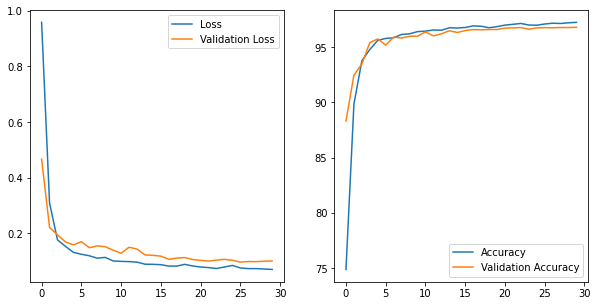

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['binary_accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_binary_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

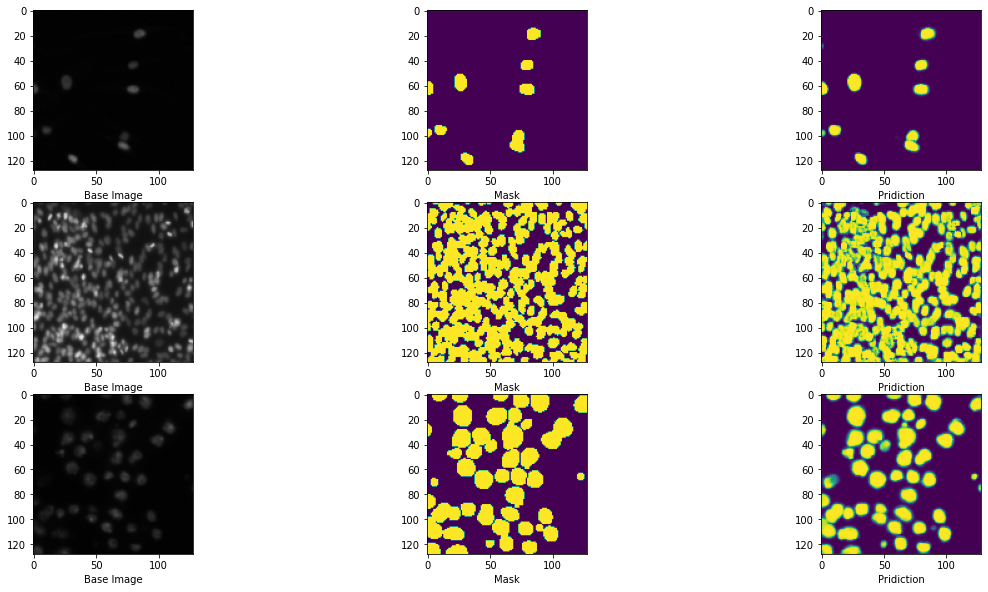

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)

plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

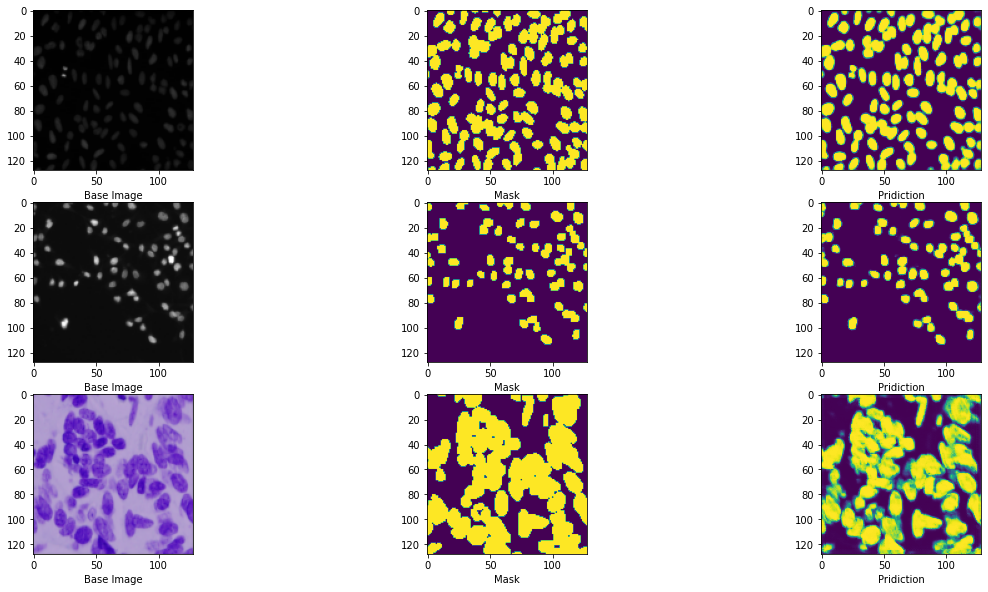

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)

plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(1097728, 1)

Area under the ROC curve: 0.945341387060079


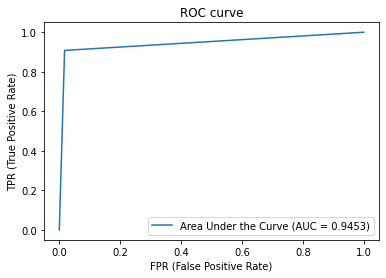

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score


y_scores = preds.reshape(preds.shape[0]*preds.shape[1]*preds.shape[2]*preds.shape[3], 1)
print(y_scores.shape)

y_true = validation_seg.reshape(validation_seg.shape[0]*validation_seg.shape[1]*validation_seg.shape[2]*validation_seg.shape[3], 1)

y_scores = np.where(y_scores>0.5, 1, 0)
y_true   = np.where(y_true>0.5, 1, 0)


#output_folder = '/content/drive/My Drive/mammogram_segmentation/INB'

#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"ROC.png")


Area under Precision-Recall curve: 0.932946838381119


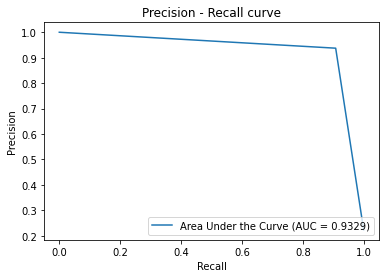

In [ ]:
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0] 
recall = np.fliplr([recall])[0]
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"Precision_recall.png")

In [ ]:
#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))


Confusion matrix:  Custom threshold (for positive) of 0.5
[[838285  14852]
 [ 22480 222111]]
Global Accuracy: 0.9659915753264925
Specificity: 0.9825913071405882
Sensitivity: 0.90809146697957
Precision: 0.9373235484020712

Jaccard similarity score: 0.8561071217955389

F1 score (F-measure): 0.9224759840017942


# Segmentation performance using BCDU-Net

In [ ]:
def BCDU_net_D3(input_size = (256,256,1)):
    N = input_size[0]
    inputs = Input(input_size) 
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
  
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    # D1
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)     
    conv4_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4_1 = Dropout(0.5)(conv4_1)
    # D2
    conv4_2 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(drop4_1)     
    conv4_2 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_2)
    conv4_2 = Dropout(0.5)(conv4_2)
    # D3
    merge_dense = concatenate([conv4_2,drop4_1], axis = 3)
    conv4_3 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge_dense)     
    conv4_3 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_3)
    drop4_3 = Dropout(0.5)(conv4_3)

    up6 = Conv2DTranspose(256, kernel_size=2, strides=2, padding='same',kernel_initializer = 'he_normal')(drop4_3)
    up6 = BatchNormalization(axis=3)(up6)
    up6 = Activation('relu')(up6)

    x1 = Reshape(target_shape=(1, np.int32(N/4), np.int32(N/4), 256))(drop3)
    x2 = Reshape(target_shape=(1, np.int32(N/4), np.int32(N/4), 256))(up6)
    merge6  = concatenate([x1,x2], axis = 1) 
    merge6 = ConvLSTM2D(filters = 128, kernel_size=(3, 3), padding='same', return_sequences = False, go_backwards = True,kernel_initializer = 'he_normal' )(merge6)
            
    conv6 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2DTranspose(128, kernel_size=2, strides=2, padding='same',kernel_initializer = 'he_normal')(conv6)
    up7 = BatchNormalization(axis=3)(up7)
    up7 = Activation('relu')(up7)

    x1 = Reshape(target_shape=(1, np.int32(N/2), np.int32(N/2), 128))(conv2)
    x2 = Reshape(target_shape=(1, np.int32(N/2), np.int32(N/2), 128))(up7)
    merge7  = concatenate([x1,x2], axis = 1) 
    merge7 = ConvLSTM2D(filters = 64, kernel_size=(3, 3), padding='same', return_sequences = False, go_backwards = True,kernel_initializer = 'he_normal' )(merge7)
        
    conv7 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2DTranspose(64, kernel_size=2, strides=2, padding='same',kernel_initializer = 'he_normal')(conv7)
    up8 = BatchNormalization(axis=3)(up8)
    up8 = Activation('relu')(up8)    

    x1 = Reshape(target_shape=(1, N, N, 64))(conv1)
    x2 = Reshape(target_shape=(1, N, N, 64))(up8)
    merge8  = concatenate([x1,x2], axis = 1) 
    merge8 = ConvLSTM2D(filters = 32, kernel_size=(3, 3), padding='same', return_sequences = False, go_backwards = True,kernel_initializer = 'he_normal' )(merge8)    
    
    conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv9 = Conv2D(1, 1, activation = 'sigmoid')(conv8)

    return Model(inputs=[inputs], outputs=[conv9])
    

In [ ]:
model = BCDU_net_D3(input_size=(IMG_HEIGHT,IMG_WIDTH,3))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 128, 128, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_39 (Conv2D)             (None, 128, 128, 64  36928       ['conv2d_38[0][0]']              
                                )                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights_best.h5".format('cxr_reg')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                   patience=3, 
                                   verbose=1, mode='min', epsilon=0.0001, cooldown=2, min_lr=1e-6)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
from IPython.display import clear_output
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split

model.compile(optimizer=Adam(lr=2e-4), #optimizer=tf.keras.optimizers.SGD(learning_rate=0.1) ; optimizer=Adam(lr=2e-4)
              loss=['binary_crossentropy'], #loss=['binary_crossentropy'];loss=[dice_coef_loss]
           metrics = [dice_coef, 'binary_accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((X_train), 
                                                            (Y_train).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)

loss_history = model.fit(x = train_vol,
                       y = train_seg,
                         batch_size = 16,
                  epochs = 50,
                  validation_data =(test_vol,test_seg) ,
                  callbacks=callbacks_list)

#clear_output()
                                                                        

print(validation_vol.shape)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - ETA: 0s - loss: 0.5267 - dice_coef: 0.3227 - binary_accuracy: 0.8163
Epoch 1: val_loss improved from inf to 0.29816, saving model to cxr_reg_weights_best.h5
34/34 [==============================] - 40s 721ms/step - loss: 0.5267 - dice_coef: 0.3227 - binary_accuracy: 0.8163 - val_loss: 0.2982 - val_dice_coef: 0.4363 - val_binary_accuracy: 0.8977 - lr: 2.0000e-04
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.1776 - dice_coef: 0.6980 - binary_accuracy: 0.9368
Epoch 2: val_loss improved from 0.29816 to 0.20180, saving model to cxr_reg_weights_best.h5
34/34 [==============================] - 18s 516ms/step - loss: 0.1776 - dice_coef: 0.6980 - binary_accuracy: 0.9368 - val_loss: 0.2018 - val_dice_coef: 0.7389 - val_binary_accuracy: 0.9254 - lr: 2.0000e-04
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.1341 - dice_coef: 0.8017 - binary_accuracy: 0.9490
Epoch 3: val_loss did not improve from 0.20180
34/34 [

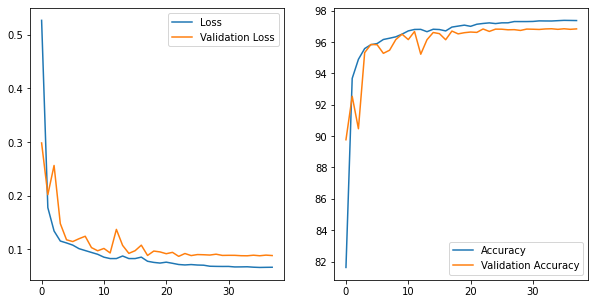

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['binary_accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_binary_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

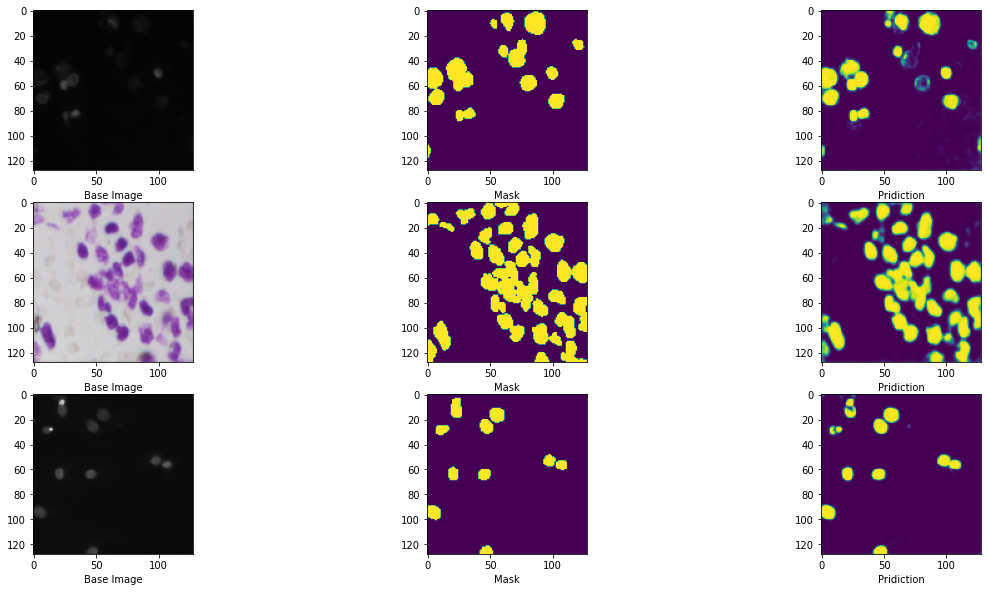

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)

plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

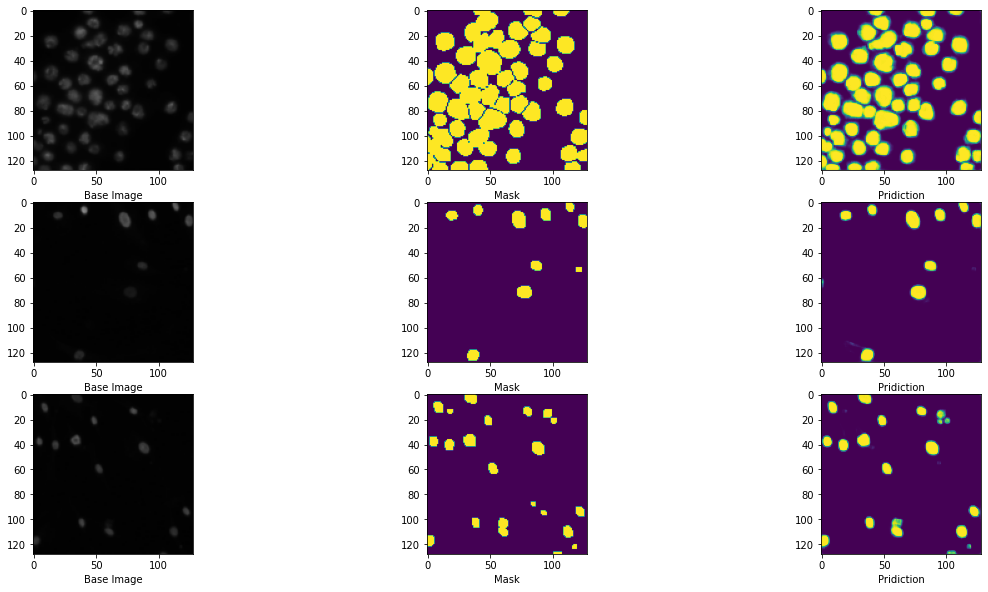

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)

plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(1097728, 1)

Area under the ROC curve: 0.9472039126673579


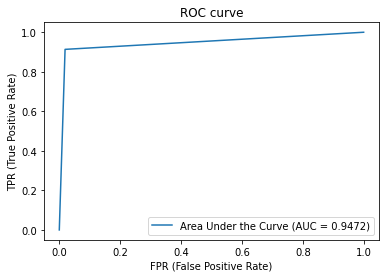

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score


y_scores = preds.reshape(preds.shape[0]*preds.shape[1]*preds.shape[2]*preds.shape[3], 1)
print(y_scores.shape)

y_true = validation_seg.reshape(validation_seg.shape[0]*validation_seg.shape[1]*validation_seg.shape[2]*validation_seg.shape[3], 1)

y_scores = np.where(y_scores>0.5, 1, 0)
y_true   = np.where(y_true>0.5, 1, 0)


#output_folder = '/content/drive/My Drive/mammogram_segmentation/INB'

#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"ROC.png")


Area under Precision-Recall curve: 0.9325545003129476


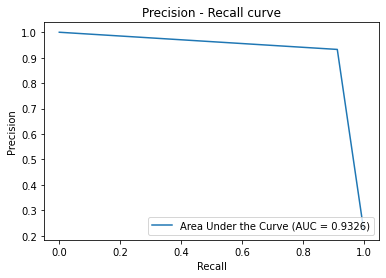

In [ ]:
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0] 
recall = np.fliplr([recall])[0]
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"Precision_recall.png")

In [ ]:
#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))


Confusion matrix:  Custom threshold (for positive) of 0.5
[[836946  16191]
 [ 21185 223406]]
Global Accuracy: 0.9659514925373134
Specificity: 0.9810218054075723
Sensitivity: 0.9133860199271436
Precision: 0.9324240286814943

Jaccard similarity score: 0.8566772246550759

F1 score (F-measure): 0.922806843622725


# Segmentation performance using Double UNet **(Jha et al)**

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from IPython.display import clear_output
from sklearn.model_selection import train_test_split


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *
from tensorflow.keras.applications.inception_v3 import InceptionV3

def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x



def conv_block(inputs, filters):
    x = inputs

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = squeeze_excite_block(x)

    return x

In [ ]:
def encoder1(inputs):
    skip_connections = []

    model = VGG19(include_top=False, weights='imagenet', input_tensor=inputs)
    names = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]
    for name in names:
        skip_connections.append(model.get_layer(name).output)

    output = model.get_layer("block5_conv4").output
    return output, skip_connections

def decoder1(inputs, skip_connections):
    num_filters = [256, 128, 64, 32]
    skip_connections.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

def encoder2(inputs):
    num_filters = [32, 64, 128, 256]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2))(x)

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    num_filters = [256, 128, 64, 32]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_1[i], skip_2[i]])
        x = conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same")(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = Conv2D(filter, 1, padding="same")(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation='bilinear')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False)(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False)(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    outputs = Concatenate()([outputs1, outputs2])

    model = Model(inputs, outputs)
    return model

In [ ]:
def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + smooth) / (union + smooth)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

In [ ]:
#miou = tf.keras.metrics.MeanIoU(num_classes=2)
model = build_model((128,128,3))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy', iou])

#model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
#                  metrics=[dice_coef, 'binary_accuracy', iou, miou])
model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 128, 128, 64  36928       ['block1_conv1[0][0]']           
                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 activation_7 (Activation)      (None, 8, 8, 64)     0           ['batch_normalization_7[0][0]']  
                                                                                                  
 concatenate_12 (Concatenate)   (None, 8, 8, 320)    0           ['up_sampling2d[0][0]',          
                                                                  'activation_4[0][0]',           
                                                                  'activation_5[0][0]',           
                                                                  'activation_6[0][0]',           
                                                                  'activation_7[0][0]']           
                                                                                                  
 conv2d_63 (Conv2D)             (None, 8, 8, 64)     20480       ['concatenate_12[0][0]']         
          

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss'),
           tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [ ]:
# The model is trained using Xception, DenseNet and VGG16

from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((X_train), 
                                                            (Y_train).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)
#ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])])
#train_seg = ct.fit_transform(train_seg)



In [ ]:
print(train_vol.shape)
print(train_seg.shape)
print(train_seg.shape)
print(X_train.shape)

(542, 128, 128, 3)
(542, 128, 128, 1)
(542, 128, 128, 1)
(670, 128, 128, 3)


In [ ]:
loss_history = model.fit(x = train_vol,
                         y = train_seg,
                         batch_size = 16,
                         epochs = 50,
                         validation_data =(test_vol,test_seg) ,
                         callbacks=callbacks_list)

#clear_output()
                                                                        

print(validation_vol.shape)

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.4473 - accuracy: 0.7877
Epoch 1: val_loss did not improve from 0.08680
34/34 [==============================] - 35s 611ms/step - loss: 0.4473 - accuracy: 0.7877 - val_loss: 0.4503 - val_accuracy: 0.8411 - lr: 0.0010
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.2823 - accuracy: 0.8183
Epoch 2: val_loss did not improve from 0.08680
34/34 [==============================] - 11s 330ms/step - loss: 0.2823 - accuracy: 0.8183 - val_loss: 0.2722 - val_accuracy: 0.7675 - lr: 0.0010
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.1870 - accuracy: 0.8108
Epoch 3: val_loss did not improve from 0.08680
34/34 [==============================] - 11s 327ms/step - loss: 0.1870 - accuracy: 0.8108 - val_loss: 0.1551 - val_accuracy: 0.6276 - lr: 0.0010
Epoch 4/50
34/34 [==============================] - ETA: 0s - loss: 0.1403 - accuracy: 0.7888
Epoch 4: val_loss did not improve from 0.08680
3

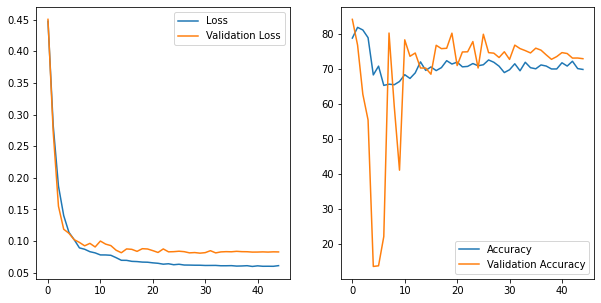

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

(67, 128, 128)


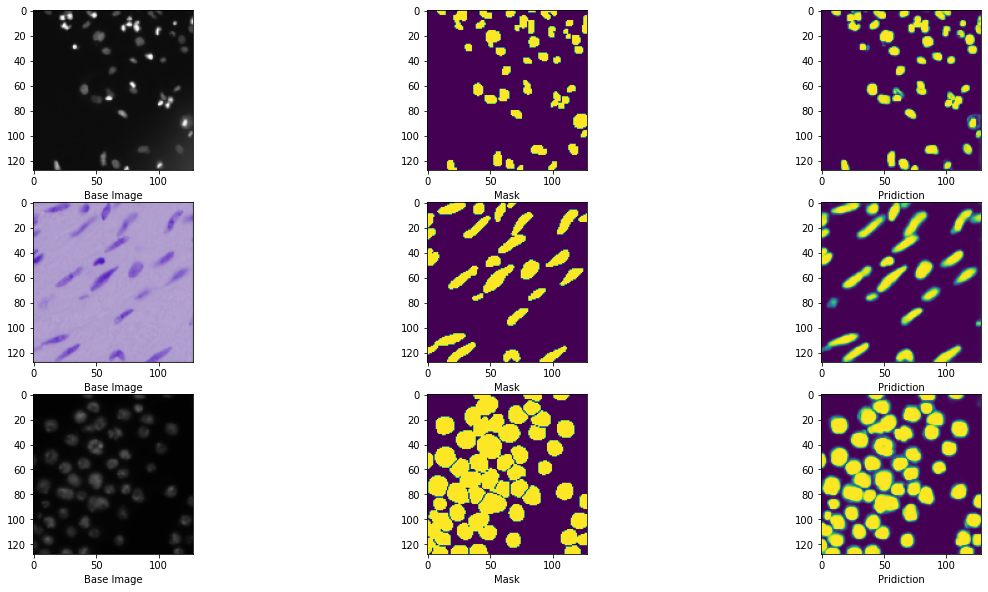

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(67, 128, 128, 2)


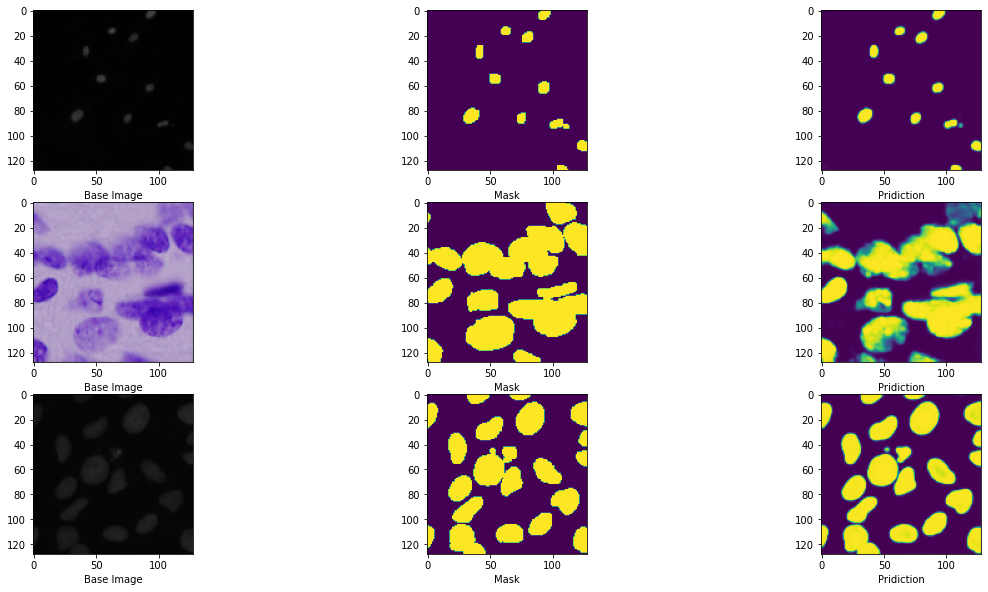

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
print(preds.shape)
preds = preds[:,:,:,1]
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(1097728, 1)

Area under the ROC curve: 0.9491460288975917


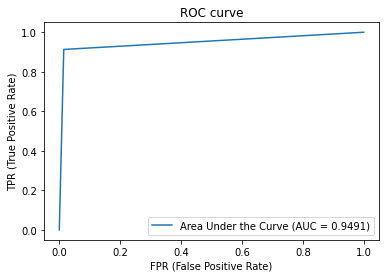

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

#preds = model.predict(validation_vol)
y_scores = preds.reshape(preds.shape[0]*preds.shape[1]*preds.shape[2]*1, 1)
print(y_scores.shape)

y_true = validation_seg.reshape(validation_seg.shape[0]*validation_seg.shape[1]*validation_seg.shape[2]*validation_seg.shape[3], 1)

y_scores = np.where(y_scores>0.5, 1, 0)
y_true   = np.where(y_true>0.5, 1, 0)


#output_folder = '/content/drive/My Drive/mammogram_segmentation/INB'

#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"ROC.png")


Area under Precision-Recall curve: 0.9396588329166091


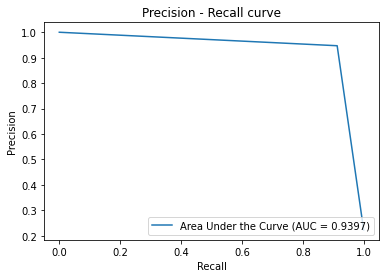

In [ ]:
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0] 
recall = np.fliplr([recall])[0]
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"Precision_recall.png")

In [ ]:
#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))


Confusion matrix:  Custom threshold (for positive) of 0.5
[[840633  12504]
 [ 21292 223299]]
Global Accuracy: 0.9692127740205224
Specificity: 0.9853435028606191
Sensitivity: 0.9129485549345643
Precision: 0.9469726848258928

Jaccard similarity score: 0.8685466461813727

F1 score (F-measure): 0.9296494127736815


# **Segmentation performance on Modified Double U-Net (Proposed)**

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from IPython.display import clear_output
from sklearn.model_selection import train_test_split


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *
from tensorflow.keras.applications.inception_v3 import InceptionV3

def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x



def conv_block(inputs, filters):
    x = inputs

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = squeeze_excite_block(x)

    return x

In [ ]:
def encoder1(inputs):
    skip_connections = []
    model = Xception(include_top=False, weights='imagenet', input_tensor=inputs)    
    model.summary()
    model1 = DenseNet121(include_top=False, weights='imagenet', input_tensor=inputs)    
    model1.summary()
    model2 = VGG19(include_top=False, weights='imagenet', input_tensor=inputs)    
    model2.summary()
    #names = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]      #for VGG19
    #names = ["block1_conv2", "block2_conv2", "block3_conv3", "block4_conv1"]     #for VGG16
    #names = ["input_3", "conv1/relu", "pool2_conv", "pool3_conv"]      #for DenseNet121
    #names = ["conv2d_20" , "conv2d_30" , "conv2d_40"]

    skip_connections.append(model.get_layer("input_8").output)
    skip_connections.append(model1.get_layer("conv1/relu").output)
    skip_connections.append(model1.get_layer("pool2_conv").output)
    skip_connections.append(model2.get_layer("block4_conv4").output)

    output = model2.get_layer("block5_conv4").output                #for VGG19
    #output = model.get_layer("block5_conv3").output                 #for VGG16
    #output = model.get_layer("pool4_conv").output                 #for DenseNet121
    return output, skip_connections

def decoder1(inputs, skip_connections):
    num_filters = [256, 128, 64, 32]
    skip_connections.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

def encoder2(inputs):
    num_filters = [32, 64, 128, 256]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2))(x)

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    num_filters = [256, 128, 64, 32]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_1[i], skip_2[i]])
        x = conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same")(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = Conv2D(filter, 1, padding="same")(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation='bilinear')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False)(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False)(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    outputs = Concatenate()([outputs1, outputs2])

    model = Model(inputs, outputs)
    return model

In [ ]:
#miou = tf.keras.metrics.MeanIoU(num_classes=2)
model = build_model((128,128,3))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy', iou])

#model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
#                  metrics=[dice_coef, 'binary_accuracy', iou, miou])
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_8[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 conv2d_112 (Conv2D)            (None, 8, 8, 64)     294912      ['block5_conv4[0][0]']           
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 activation_41 (Activation)     (None, 1, 1, 64)     0           ['batch_normalization_51[0][0]'] 
                                                                                                  
 batch_normalization_52 (BatchN  (None, 8, 8, 64)    256         ['conv2d_109[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 batch_nor

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss'),
           tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [ ]:
# The model is trained using Xception, DenseNet and VGG16

from IPython.display import clear_output 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((X_train), 
                                                            (Y_train).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)
#ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])])
#train_seg = ct.fit_transform(train_seg)



In [ ]:
print(train_vol.shape)
print(train_seg.shape)
print(train_seg.shape)
print(X_train.shape)

(542, 128, 128, 3)
(542, 128, 128, 1)
(542, 128, 128, 1)
(670, 128, 128, 3)


In [ ]:
loss_history = model.fit(x = train_vol,
                         y = train_seg,
                         batch_size = 16,
                         epochs = 50,
                         validation_data =(test_vol,test_seg) ,
                         callbacks=callbacks_list)

#clear_output()
                                                                        

print(validation_vol.shape)

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.5880
Epoch 1: val_loss did not improve from 0.07781
34/34 [==============================] - 10s 279ms/step - loss: 0.0490 - accuracy: 0.5880 - val_loss: 0.0805 - val_accuracy: 0.5255 - lr: 1.5625e-05
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.0483 - accuracy: 0.5994
Epoch 2: val_loss did not improve from 0.07781
34/34 [==============================] - 10s 281ms/step - loss: 0.0483 - accuracy: 0.5994 - val_loss: 0.0802 - val_accuracy: 0.5380 - lr: 1.5625e-05
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.5955
Epoch 3: val_loss did not improve from 0.07781
34/34 [==============================] - 10s 280ms/step - loss: 0.0482 - accuracy: 0.5955 - val_loss: 0.0804 - val_accuracy: 0.5312 - lr: 1.5625e-05
Epoch 4/50
34/34 [==============================] - ETA: 0s - loss: 0.0477 - accuracy: 0.5977
Epoch 4: val_loss did not improve fr

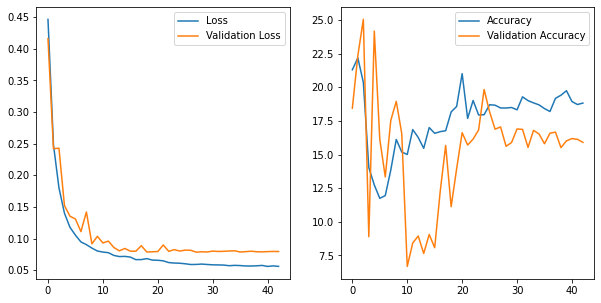

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

(67, 128, 128)


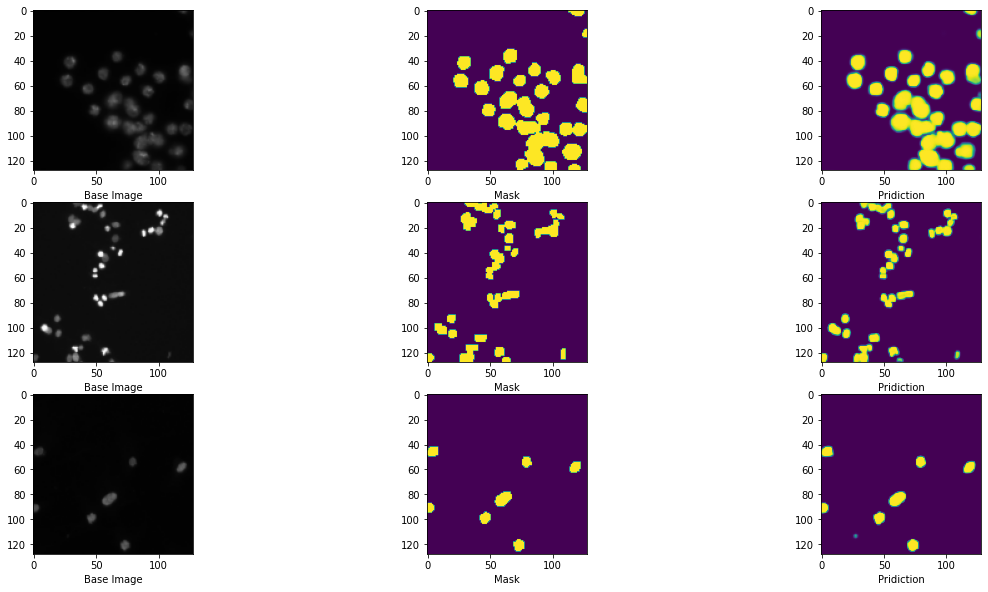

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(67, 128, 128)


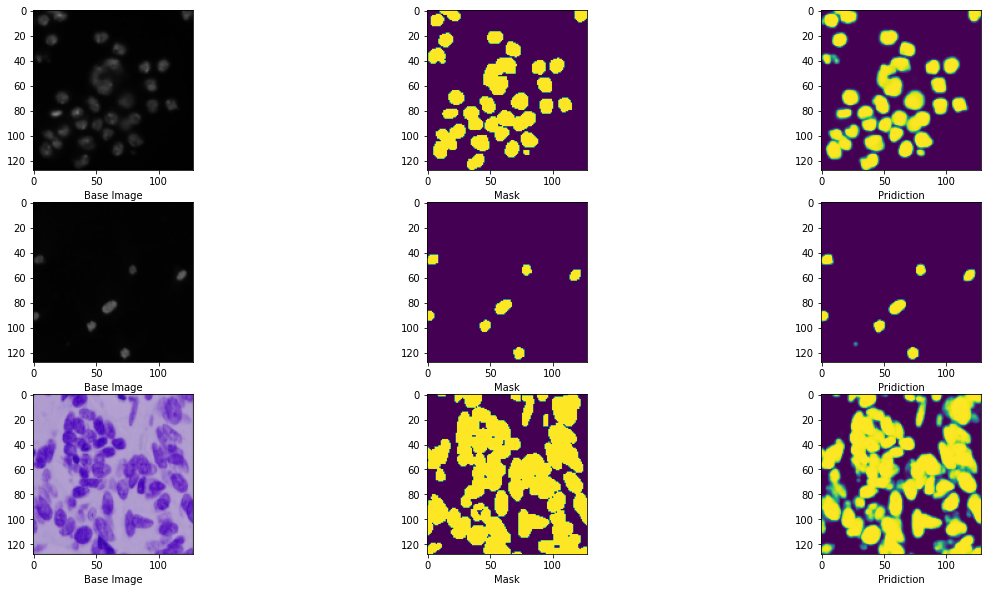

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],30)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(1097728, 1)

Area under the ROC curve: 0.9448363454830822


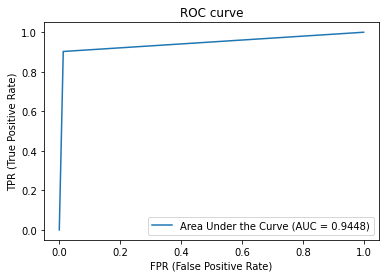

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

#preds = model.predict(validation_vol)
y_scores = preds.reshape(preds.shape[0]*preds.shape[1]*preds.shape[2]*1, 1)
print(y_scores.shape)

y_true = validation_seg.reshape(validation_seg.shape[0]*validation_seg.shape[1]*validation_seg.shape[2]*validation_seg.shape[3], 1)

y_scores = np.where(y_scores>0.5, 1, 0)
y_true   = np.where(y_true>0.5, 1, 0)


#output_folder = '/content/drive/My Drive/mammogram_segmentation/INB'

#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"ROC.png")


Area under Precision-Recall curve: 0.9382073023636974


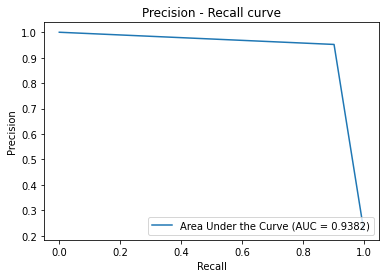

In [ ]:
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0] 
recall = np.fliplr([recall])[0]
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"Precision_recall.png")

In [ ]:
#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))


Confusion matrix:  Custom threshold (for positive) of 0.5
[[841887  11250]
 [ 21762 222829]]
Global Accuracy: 0.9681758945124789
Specificity: 0.996925632112478
Sensitivity: 0.9137452189001456
Precision: 0.9520124023121478

Jaccard similarity score: 0.8987001237010122

F1 score (F-measure): 0.9467002859124789


# Ensemble of DenseNet and VGGNet only [Double U-Net (A)]

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from IPython.display import clear_output

from sklearn.model_selection import train_test_split


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *
from tensorflow.keras.applications.inception_v3 import InceptionV3

def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x



def conv_block(inputs, filters):
    x = inputs

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = squeeze_excite_block(x)

    return x

In [ ]:
def encoder1(inputs):
    skip_connections = []
    model1 = DenseNet121(include_top=False, weights='imagenet', input_tensor=inputs)    
    model1.summary()
    model2 = VGG19(include_top=False, weights='imagenet', input_tensor=inputs)    
    model2.summary()
    #names = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]      #for VGG19
    #names = ["block1_conv2", "block2_conv2", "block3_conv3", "block4_conv1"]     #for VGG16
    #names = ["input_3", "conv1/relu", "pool2_conv", "pool3_conv"]      #for DenseNet121
    #names = ["conv2d_20" , "conv2d_30" , "conv2d_40"]

    skip_connections.append(model1.get_layer("input_10").output)
    skip_connections.append(model1.get_layer("conv1/relu").output)
    skip_connections.append(model1.get_layer("pool2_conv").output)
    skip_connections.append(model2.get_layer("block4_conv4").output)

    output = model2.get_layer("block5_conv4").output                #for VGG19
    #output = model.get_layer("block5_conv3").output                 #for VGG16
    #output = model.get_layer("pool4_conv").output                 #for DenseNet121
    return output, skip_connections

def decoder1(inputs, skip_connections):
    num_filters = [256, 128, 64, 32]
    skip_connections.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

def encoder2(inputs):
    num_filters = [32, 64, 128, 256]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2))(x)

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    num_filters = [256, 128, 64, 32]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_1[i], skip_2[i]])
        x = conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same")(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = Conv2D(filter, 1, padding="same")(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation='bilinear')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False)(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False)(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    outputs = Concatenate()([outputs1, outputs2])

    model = Model(inputs, outputs)
    return model

In [ ]:
#miou = tf.keras.metrics.MeanIoU(num_classes=2)
model = build_model((128,128,3))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy', iou])

#model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
#                  metrics=[dice_coef, 'binary_accuracy', iou, miou])
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_8 (ZeroPadding2  (None, 134, 134, 3)  0          ['input_10[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d_8[0][0]']       
                                                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 n)                                                                                               
                                                                                                  
 block4_conv4 (Conv2D)          (None, 16, 16, 512)  2359808     ['block4_conv3[0][0]']           
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 32, 32, 128)  16384       ['conv2_block3_0_relu[0][0]']    
                                                                                                  
 block4_pool (MaxPooling2D)     (None, 8, 8, 512)    0           ['block4_conv4[0][0]']           
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
          

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss'),
           tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
# The model is trained using Xception, DenseNet and VGG16

from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((X_train), 
                                                            (Y_train).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)
#ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])])
#train_seg = ct.fit_transform(train_seg)



In [ ]:
print(train_vol.shape)
print(train_seg.shape)
print(train_seg.shape)
print(X_train.shape)

(542, 128, 128, 3)
(542, 128, 128, 1)
(542, 128, 128, 1)
(670, 128, 128, 3)


In [ ]:
loss_history = model.fit(x = train_vol,
                         y = train_seg,
                         batch_size = 16,
                         epochs = 50,
                         validation_data =(test_vol,test_seg) ,
                         callbacks=callbacks_list)

#clear_output()
                                                                        

print(validation_vol.shape)

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.4554 - accuracy: 0.8145
Epoch 1: val_loss did not improve from 0.07957
34/34 [==============================] - 28s 377ms/step - loss: 0.4554 - accuracy: 0.8145 - val_loss: 2.5198 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.2821 - accuracy: 0.8052
Epoch 2: val_loss did not improve from 0.07957
34/34 [==============================] - 11s 327ms/step - loss: 0.2821 - accuracy: 0.8052 - val_loss: 1.1926 - val_accuracy: 0.6766 - lr: 0.0010
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.1979 - accuracy: 0.8264
Epoch 3: val_loss did not improve from 0.07957
34/34 [==============================] - 12s 340ms/step - loss: 0.1979 - accuracy: 0.8264 - val_loss: 0.5570 - val_accuracy: 0.7418 - lr: 0.0010
Epoch 4/50
34/34 [==============================] - ETA: 0s - loss: 0.1536 - accuracy: 0.8628
Epoch 4: val_loss did not improve from 0.07957
3

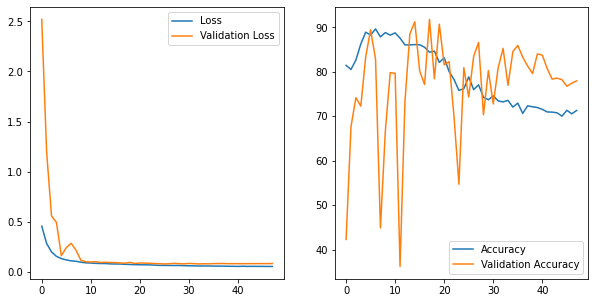

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

(67, 128, 128)


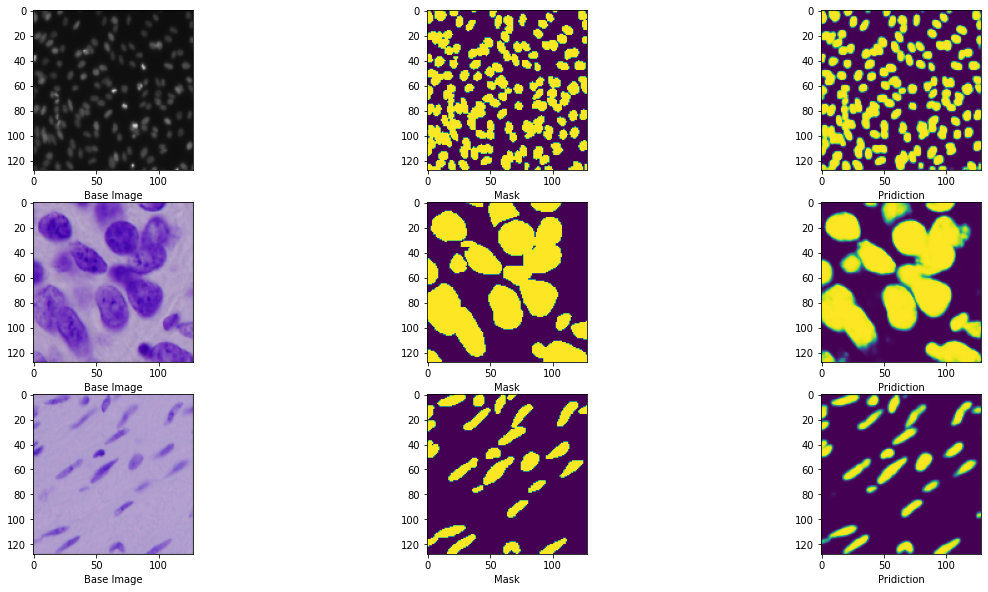

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(67, 128, 128)


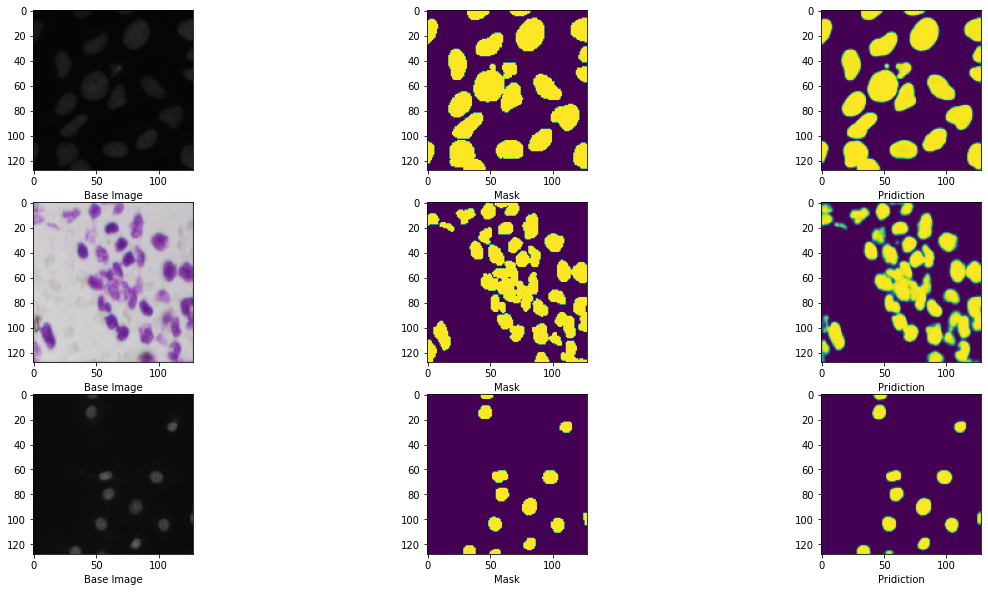

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(1097728, 1)

Area under the ROC curve: 0.9403164818325382


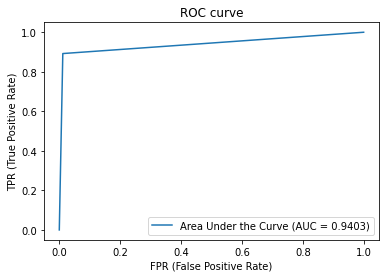

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

#preds = model.predict(validation_vol)
y_scores = preds.reshape(preds.shape[0]*preds.shape[1]*preds.shape[2]*1, 1)
print(y_scores.shape)

y_true = validation_seg.reshape(validation_seg.shape[0]*validation_seg.shape[1]*validation_seg.shape[2]*validation_seg.shape[3], 1)

y_scores = np.where(y_scores>0.5, 1, 0)
y_true   = np.where(y_true>0.5, 1, 0)


#output_folder = '/content/drive/My Drive/mammogram_segmentation/INB'

#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"ROC.png")


Area under Precision-Recall curve: 0.93650062860717


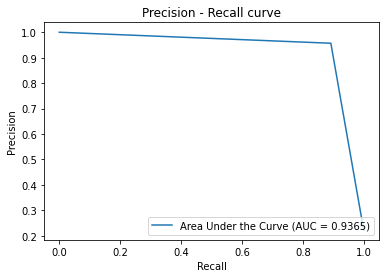

In [ ]:
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0] 
recall = np.fliplr([recall])[0]
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"Precision_recall.png")

In [ ]:
#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))


Confusion matrix:  Custom threshold (for positive) of 0.5
[[843283   9854]
 [ 26371 218220]]
Global Accuracy: 0.9670000218633396
Specificity: 0.9884496862754751
Sensitivity: 0.8921832773896015
Precision: 0.956794724519235

Jaccard similarity score: 0.857631315215469

F1 score (F-measure): 0.9233600964742471


# Double U-Net with DenseNet only

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from IPython.display import clear_output 
from sklearn.model_selection import train_test_split


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *
from tensorflow.keras.applications.inception_v3 import InceptionV3

def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x



def conv_block(inputs, filters):
    x = inputs

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = squeeze_excite_block(x)

    return x

In [ ]:
def encoder1(inputs):
    skip_connections = []
    model = DenseNet121(include_top=False, weights='imagenet', input_tensor=inputs)    
    model.summary()
    names = ["input_12", "conv1/relu", "pool2_conv", "pool3_conv"]      #for DenseNet121
    #names = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]
    for name in names:
        skip_connections.append(model.get_layer(name).output)


    output = model.get_layer("pool4_conv").output                 #for DenseNet121
    return output, skip_connections

def decoder1(inputs, skip_connections):
    num_filters = [256, 128, 64, 32]
    skip_connections.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

def encoder2(inputs):
    num_filters = [32, 64, 128, 256]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2))(x)

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    num_filters = [256, 128, 64, 32]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_1[i], skip_2[i]])
        x = conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same")(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = Conv2D(filter, 1, padding="same")(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation='bilinear')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False)(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False)(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    outputs = Concatenate()([outputs1, outputs2])

    model = Model(inputs, outputs)
    return model

In [ ]:
#miou = tf.keras.metrics.MeanIoU(num_classes=2)
model = build_model((128,128,3))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy', iou])

#model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
#                  metrics=[dice_coef, 'binary_accuracy', iou, miou])
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_12 (ZeroPadding  (None, 134, 134, 3)  0          ['input_12[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d_12[0][0]']      
                                                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 conv2_block6_2_conv (Conv2D)   (None, 32, 32, 32)   36864       ['conv2_block6_1_relu[0][0]']    
                                                                                                  
 conv2_block6_concat (Concatena  (None, 32, 32, 256)  0          ['conv2_block5_concat[0][0]',    
 te)                                                              'conv2_block6_2_conv[0][0]']    
                                                                                                  
 pool2_bn (BatchNormalization)  (None, 32, 32, 256)  1024        ['conv2_block6_concat[0][0]']    
                                                                                                  
 pool2_relu (Activation)        (None, 32, 32, 256)  0           ['pool2_bn[0][0]']               
                                                                                                  
 pool2_conv (Conv2D)            (None, 32, 32, 128)  32768       ['pool2_relu[0][0]']             
          

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss'),
           tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
# The model is trained using Xception, DenseNet and VGG16

from IPython.display import clear_output

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((X_train), 
                                                            (Y_train).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)
#ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])])
#train_seg = ct.fit_transform(train_seg)



In [ ]:
loss_history = model.fit(x = train_vol,
                         y = train_seg,
                         batch_size = 16,
                         epochs = 50,
                         validation_data =(test_vol,test_seg) ,
                         callbacks=callbacks_list)

#clear_output()
                                                                        

print(validation_vol.shape)

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.4100 - accuracy: 0.5590
Epoch 1: val_loss did not improve from 0.07781
34/34 [==============================] - 32s 416ms/step - loss: 0.4100 - accuracy: 0.5590 - val_loss: 3.6634 - val_accuracy: 0.8460 - lr: 0.0010
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.2768 - accuracy: 0.5742
Epoch 2: val_loss did not improve from 0.07781
34/34 [==============================] - 10s 280ms/step - loss: 0.2768 - accuracy: 0.5742 - val_loss: 2.0110 - val_accuracy: 0.3497 - lr: 0.0010
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.2060 - accuracy: 0.4709
Epoch 3: val_loss did not improve from 0.07781
34/34 [==============================] - 10s 282ms/step - loss: 0.2060 - accuracy: 0.4709 - val_loss: 0.4615 - val_accuracy: 0.2144 - lr: 0.0010
Epoch 4/50
34/34 [==============================] - ETA: 0s - loss: 0.1531 - accuracy: 0.5670
Epoch 4: val_loss did not improve from 0.07781
3

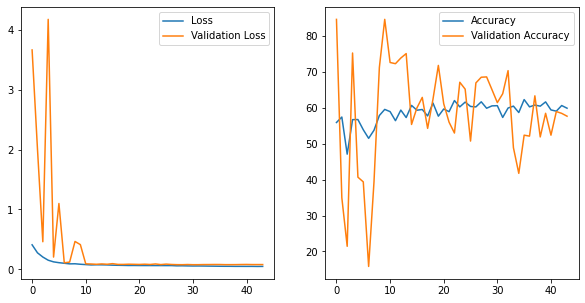

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

(67, 128, 128)


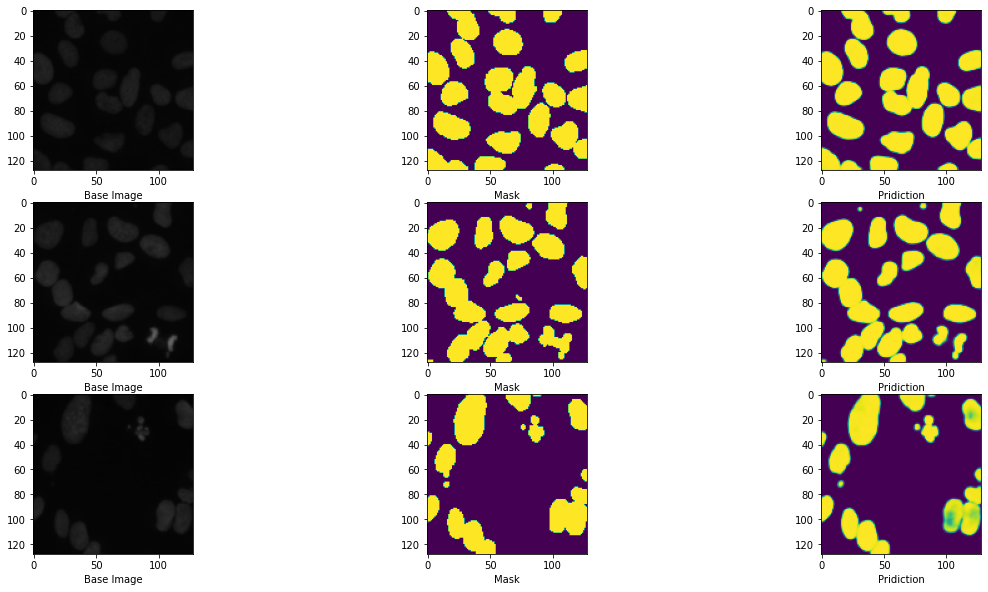

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(67, 128, 128)


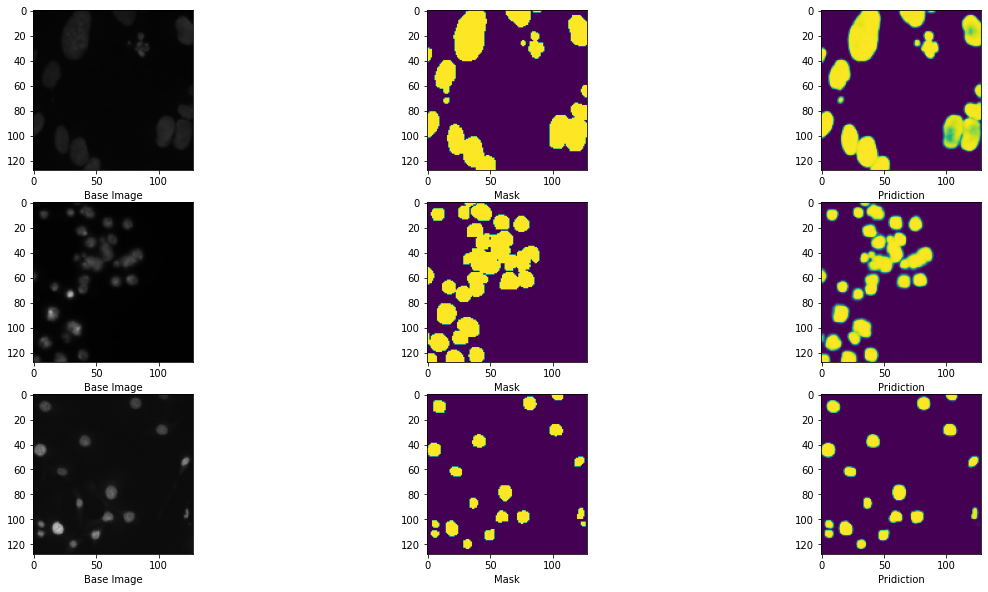

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(1097728, 1)

Area under the ROC curve: 0.9457897810650812


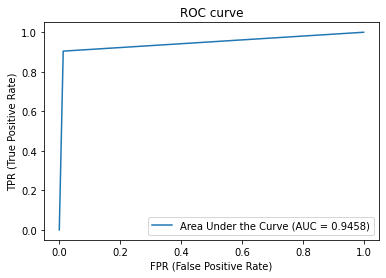

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

#preds = model.predict(validation_vol)
y_scores = preds.reshape(preds.shape[0]*preds.shape[1]*preds.shape[2]*1, 1)
print(y_scores.shape)

y_true = validation_seg.reshape(validation_seg.shape[0]*validation_seg.shape[1]*validation_seg.shape[2]*validation_seg.shape[3], 1)

y_scores = np.where(y_scores>0.5, 1, 0)
y_true   = np.where(y_true>0.5, 1, 0)


#output_folder = '/content/drive/My Drive/mammogram_segmentation/INB'

#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"ROC.png")


Area under Precision-Recall curve: 0.9391842260380673


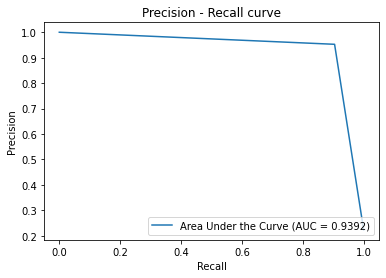

In [ ]:
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0] 
recall = np.fliplr([recall])[0]
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"Precision_recall.png")

In [ ]:
#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))


Confusion matrix:  Custom threshold (for positive) of 0.5
[[842130  11007]
 [ 23363 221228]]
Global Accuracy: 0.9626898758162313
Specificity: 0.9870982034538416
Sensitivity: 0.9044813586763208
Precision: 0.9516040433181906

Jaccard similarity score: 0.8655310291942816

F1 score (F-measure): 0.9279191990369653


# Double U-Net with DenseNet and VGG-Net [Double U-Net (B)]

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from IPython.display import clear_output

from sklearn.model_selection import train_test_split


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *
from tensorflow.keras.applications.inception_v3 import InceptionV3

def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x



def conv_block(inputs, filters):
    x = inputs

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = squeeze_excite_block(x)

    return x

In [ ]:
def encoder1(inputs):
    skip_connections = []
    model1 = DenseNet121(include_top=False, weights='imagenet', input_tensor=inputs)    
    model1.summary()
    model2 = VGG19(include_top=False, weights='imagenet', input_tensor=inputs)    
    model2.summary()
    #names = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]      #for VGG19
    #names = ["block1_conv2", "block2_conv2", "block3_conv3", "block4_conv1"]     #for VGG16
    #names = ["input_3", "conv1/relu", "pool2_conv", "pool3_conv"]      #for DenseNet121
    #names = ["conv2d_20" , "conv2d_30" , "conv2d_40"]

    skip_connections.append(model1.get_layer("input_13").output)
    skip_connections.append(model1.get_layer("conv1/relu").output)
    skip_connections.append(model2.get_layer("block3_conv4").output)
    skip_connections.append(model2.get_layer("block4_conv4").output)

    output = model2.get_layer("block5_conv4").output                #for VGG19
    #output = model.get_layer("block5_conv3").output                 #for VGG16
    #output = model.get_layer("pool4_conv").output                 #for DenseNet121
    return output, skip_connections

def decoder1(inputs, skip_connections):
    num_filters = [256, 128, 64, 32]
    skip_connections.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

def encoder2(inputs):
    num_filters = [32, 64, 128, 256]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2))(x)

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    num_filters = [256, 128, 64, 32]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_1[i], skip_2[i]])
        x = conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same")(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = Conv2D(filter, 1, padding="same")(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation='bilinear')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False)(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False)(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    outputs = Concatenate()([outputs1, outputs2])

    model = Model(inputs, outputs)
    return model

In [ ]:
#miou = tf.keras.metrics.MeanIoU(num_classes=2)
model = build_model((128,128,3))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy', iou])

#model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
#                  metrics=[dice_coef, 'binary_accuracy', iou, miou])
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_14 (ZeroPadding  (None, 134, 134, 3)  0          ['input_13[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d_14[0][0]']      
                                                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 )                                                                                                
                                                                                                  
 concatenate_58 (Concatenate)   (None, 32, 32, 512)  0           ['up_sampling2d_42[0][0]',       
                                                                  'block3_conv4[0][0]']           
                                                                                                  
 conv2d_230 (Conv2D)            (None, 32, 32, 128)  589952      ['concatenate_58[0][0]']         
                                                                                                  
 batch_normalization_167 (Batch  (None, 32, 32, 128)  512        ['conv2d_230[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss'),
           tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
# The model is trained using Xception, DenseNet and VGG16

from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((X_train), 
                                                            (Y_train).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)
#ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])])
#train_seg = ct.fit_transform(train_seg)



In [ ]:
print(train_vol.shape)
print(train_seg.shape)
print(train_seg.shape)
print(X_train.shape)

(542, 128, 128, 3)
(542, 128, 128, 1)
(542, 128, 128, 1)
(670, 128, 128, 3)


In [ ]:
loss_history = model.fit(x = train_vol,
                         y = train_seg,
                         batch_size = 16,
                         epochs = 50,
                         validation_data =(test_vol,test_seg) ,
                         callbacks=callbacks_list)

#clear_output()
                                                                        

print(validation_vol.shape)

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.4267 - accuracy: 0.7521
Epoch 1: val_loss did not improve from 0.07781
34/34 [==============================] - 25s 398ms/step - loss: 0.4267 - accuracy: 0.7521 - val_loss: 0.3731 - val_accuracy: 0.6380 - lr: 0.0010
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.2768 - accuracy: 0.5953
Epoch 2: val_loss did not improve from 0.07781
34/34 [==============================] - 11s 325ms/step - loss: 0.2768 - accuracy: 0.5953 - val_loss: 0.3013 - val_accuracy: 0.4701 - lr: 0.0010
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.2103 - accuracy: 0.5714
Epoch 3: val_loss did not improve from 0.07781
34/34 [==============================] - 11s 328ms/step - loss: 0.2103 - accuracy: 0.5714 - val_loss: 0.3013 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 4/50
34/34 [==============================] - ETA: 0s - loss: 0.1584 - accuracy: 0.5769
Epoch 4: val_loss did not improve from 0.07781
3

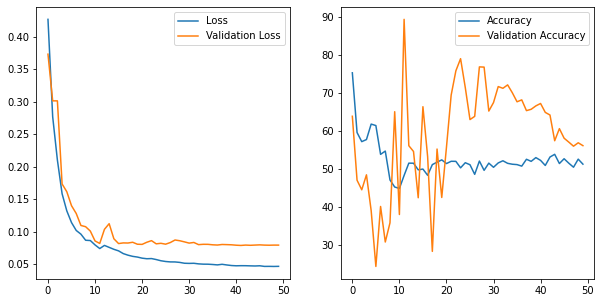

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

(67, 128, 128)


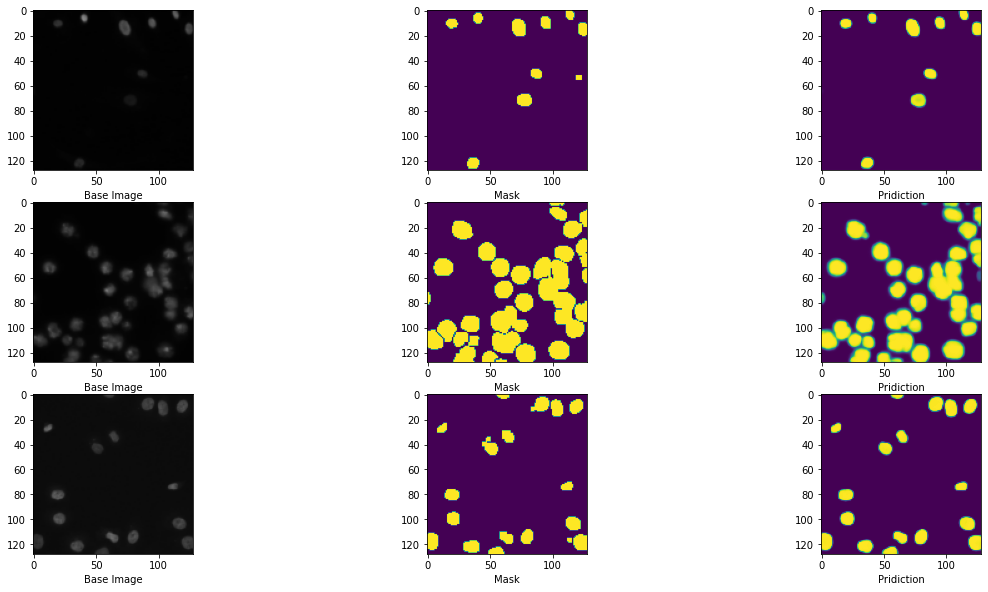

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(67, 128, 128)


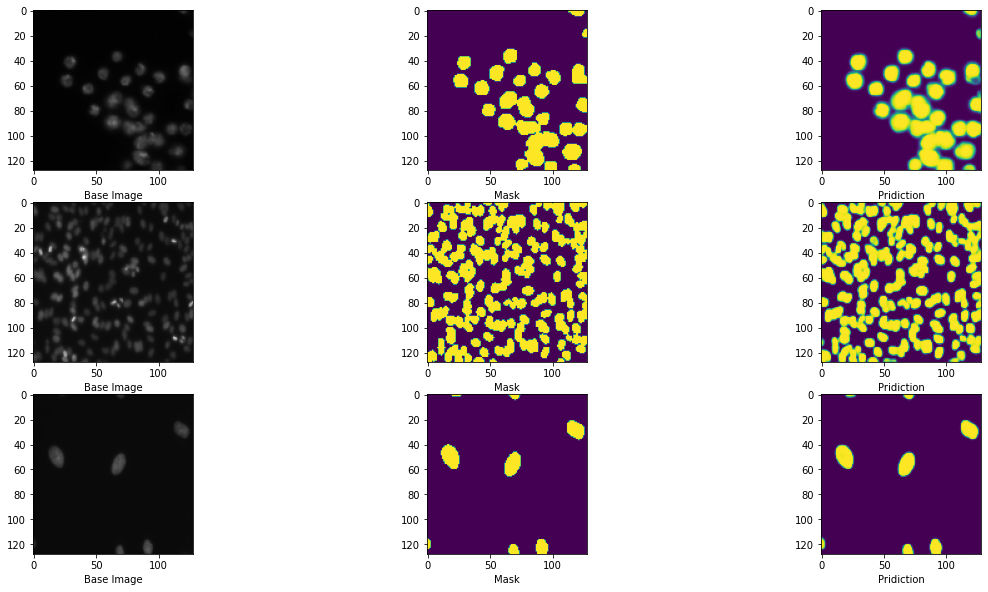

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(1097728, 1)

Area under the ROC curve: 0.9515973817714056


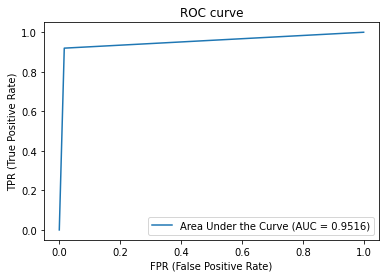

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

#preds = model.predict(validation_vol)
y_scores = preds.reshape(preds.shape[0]*preds.shape[1]*preds.shape[2]*1, 1)
print(y_scores.shape)

y_true = validation_seg.reshape(validation_seg.shape[0]*validation_seg.shape[1]*validation_seg.shape[2]*validation_seg.shape[3], 1)

y_scores = np.where(y_scores>0.5, 1, 0)
y_true   = np.where(y_true>0.5, 1, 0)


#output_folder = '/content/drive/My Drive/mammogram_segmentation/INB'

#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"ROC.png")


Area under Precision-Recall curve: 0.9395442866499514


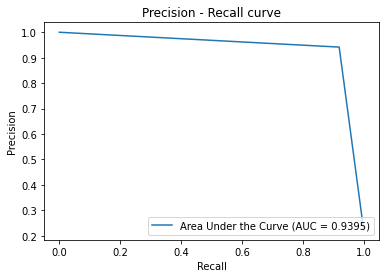

In [ ]:
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0] 
recall = np.fliplr([recall])[0]
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"Precision_recall.png")

In [ ]:
#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))


Confusion matrix:  Custom threshold (for positive) of 0.5
[[839193  13944]
 [ 19680 224911]]
Global Accuracy: 0.9653694612873134
Specificity: 0.9836556145144332
Sensitivity: 0.915539149028378
Precision: 0.9416214858386888

Jaccard similarity score: 0.869944108147833

F1 score (F-measure): 0.9304493159525572


# Double U-Net with DenseNet and Xception

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from IPython.display import clear_output
from sklearn.model_selection import train_test_split


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *
from tensorflow.keras.applications.inception_v3 import InceptionV3

def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x



def conv_block(inputs, filters):
    x = inputs

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = squeeze_excite_block(x)

    return x

In [ ]:
def encoder1(inputs):
    skip_connections = []
    model = Xception(include_top=False, weights='imagenet', input_tensor=inputs)    
    model.summary()
    model1 = DenseNet121(include_top=False, weights='imagenet', input_tensor=inputs)    
    model1.summary()
    #names = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]      #for VGG19
    #names = ["block1_conv2", "block2_conv2", "block3_conv3", "block4_conv1"]     #for VGG16
    #names = ["input_3", "conv1/relu", "pool2_conv", "pool3_conv"]      #for DenseNet121
    #names = ["conv2d_20" , "conv2d_30" , "conv2d_40"]

    skip_connections.append(model.get_layer("input_15").output)
    skip_connections.append(model1.get_layer("conv1/relu").output)
    skip_connections.append(model1.get_layer("pool2_conv").output)
    skip_connections.append(model1.get_layer("pool3_conv").output)

    output = model1.get_layer("pool4_conv").output                 #for DenseNet121
    return output, skip_connections

def decoder1(inputs, skip_connections):
    num_filters = [256, 128, 64, 32]
    skip_connections.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

def encoder2(inputs):
    num_filters = [32, 64, 128, 256]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2))(x)

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    num_filters = [256, 128, 64, 32]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_1[i], skip_2[i]])
        x = conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same")(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = Conv2D(filter, 1, padding="same")(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation='bilinear')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False)(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False)(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    outputs = Concatenate()([outputs1, outputs2])

    model = Model(inputs, outputs)
    return model

In [ ]:
#miou = tf.keras.metrics.MeanIoU(num_classes=2)
model = build_model((128,128,3))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy', iou])

#model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
#                  metrics=[dice_coef, 'binary_accuracy', iou, miou])
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_15[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 pool2_pool (AveragePooling2D)  (None, 16, 16, 128)  0           ['pool2_conv[0][0]']             
                                                                                                  
 conv3_block1_0_bn (BatchNormal  (None, 16, 16, 128)  512        ['pool2_pool[0][0]']             
 ization)                                                                                         
                                                                                                  
 conv3_block1_0_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block1_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block1_1_conv (Conv2D)   (None, 16, 16, 128)  16384       ['conv3_block1_0_relu[0][0]']    
          

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss'),
           tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
# The model is trained using Xception, DenseNet and VGG16

from IPython.display import clear_output 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((X_train), 
                                                            (Y_train).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)
#ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])])
#train_seg = ct.fit_transform(train_seg)

In [ ]:
print(train_vol.shape)
print(train_seg.shape)
print(train_seg.shape)
print(X_train.shape)

(542, 128, 128, 3)
(542, 128, 128, 1)
(542, 128, 128, 1)
(670, 128, 128, 3)


In [ ]:
loss_history = model.fit(x = train_vol,
                         y = train_seg,
                         batch_size = 16,
                         epochs = 50,
                         validation_data =(test_vol,test_seg) ,
                         callbacks=callbacks_list)

#clear_output()
                                                                        

print(validation_vol.shape)

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.4810 - accuracy: 0.8483
Epoch 1: val_loss did not improve from 0.07781
34/34 [==============================] - 33s 376ms/step - loss: 0.4810 - accuracy: 0.8483 - val_loss: 0.5319 - val_accuracy: 0.8397 - lr: 0.0010
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.3249 - accuracy: 0.8718
Epoch 2: val_loss did not improve from 0.07781
34/34 [==============================] - 10s 284ms/step - loss: 0.3249 - accuracy: 0.8718 - val_loss: 0.3580 - val_accuracy: 0.7439 - lr: 0.0010
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.2474 - accuracy: 0.8773
Epoch 3: val_loss did not improve from 0.07781
34/34 [==============================] - 10s 286ms/step - loss: 0.2474 - accuracy: 0.8773 - val_loss: 1.4312 - val_accuracy: 0.8959 - lr: 0.0010
Epoch 4/50
34/34 [==============================] - ETA: 0s - loss: 0.1890 - accuracy: 0.9117
Epoch 4: val_loss did not improve from 0.07781
3

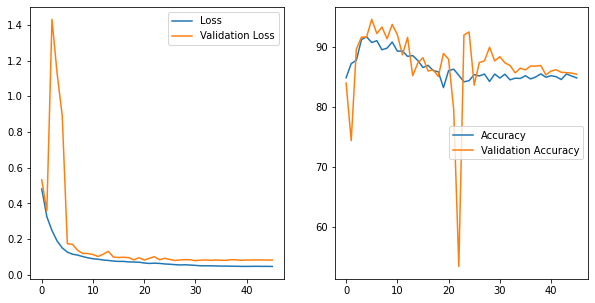

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

(67, 128, 128)


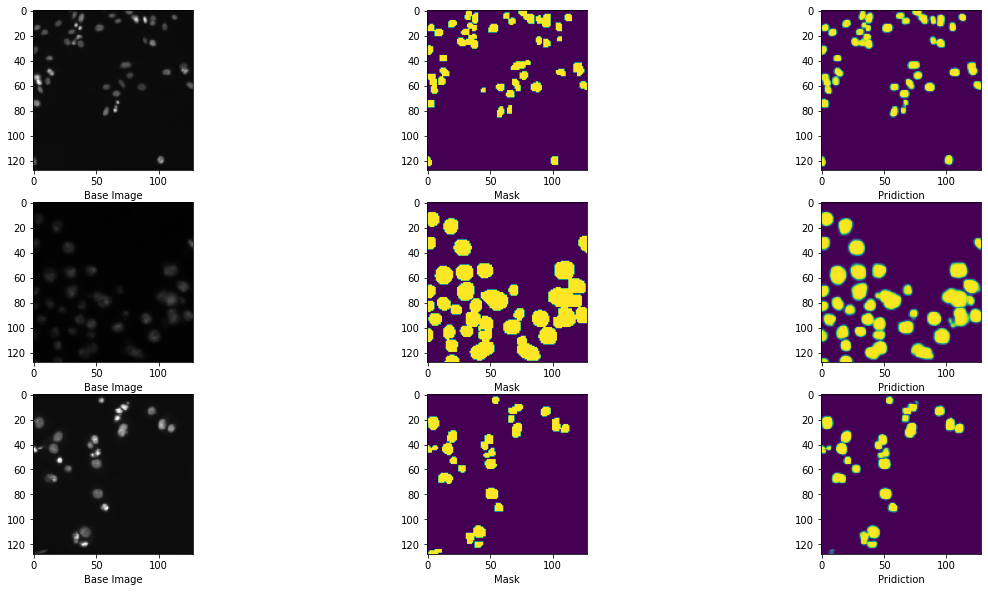

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(67, 128, 128)


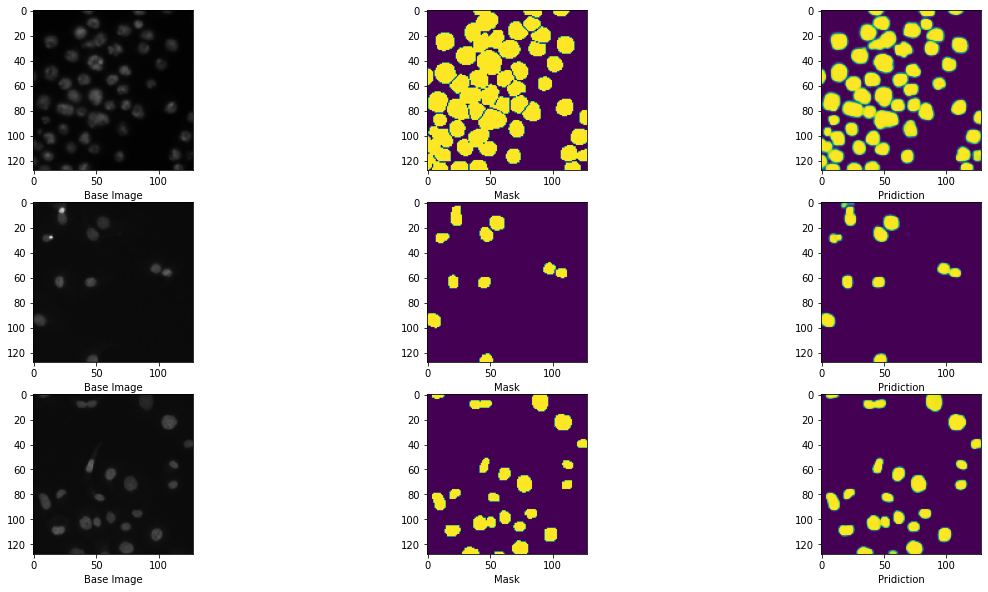

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(1097728, 1)

Area under the ROC curve: 0.9441155986351468


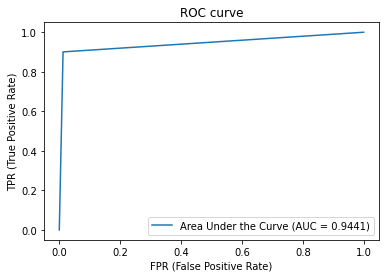

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

#preds = model.predict(validation_vol)
y_scores = preds.reshape(preds.shape[0]*preds.shape[1]*preds.shape[2]*1, 1)
print(y_scores.shape)

y_true = validation_seg.reshape(validation_seg.shape[0]*validation_seg.shape[1]*validation_seg.shape[2]*validation_seg.shape[3], 1)

y_scores = np.where(y_scores>0.5, 1, 0)
y_true   = np.where(y_true>0.5, 1, 0)


#output_folder = '/content/drive/My Drive/mammogram_segmentation/INB'

#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"ROC.png")


Area under Precision-Recall curve: 0.9385203852573072


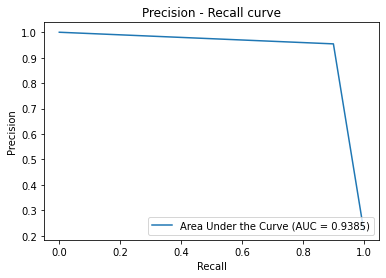

In [ ]:
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0] 
recall = np.fliplr([recall])[0]
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"Precision_recall.png")

In [ ]:
#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))


Confusion matrix:  Custom threshold (for positive) of 0.5
[[842587  10550]
 [ 24313 220278]]
Global Accuracy: 0.8682407663829291
Specificity: 0.8876338735748186
Sensitivity: 0.8005973236954753
Precision: 0.8542949728802398

Jaccard similarity score: 0.7633579079802932

F1 score (F-measure): 0.8266688962788613


# Double U-Net using Xception and VGG-Net

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from IPython.display import clear_output
from sklearn.model_selection import train_test_split


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *
from tensorflow.keras.applications.inception_v3 import InceptionV3

def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x



def conv_block(inputs, filters):
    x = inputs

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = squeeze_excite_block(x)

    return x

In [ ]:
def encoder1(inputs):
    skip_connections = []
    model = Xception(include_top=False, weights='imagenet', input_tensor=inputs)    
    model.summary()
    model1 = VGG19(include_top=False, weights='imagenet', input_tensor=inputs)    
    model1.summary()

    skip_connections.append(model.get_layer("input_16").output)
    skip_connections.append(model1.get_layer("block2_conv2").output)
    skip_connections.append(model1.get_layer("block3_conv4").output)
    skip_connections.append(model1.get_layer("block4_conv4").output)

    output = model1.get_layer("block5_conv4").output                #for VGG19
    return output, skip_connections

def decoder1(inputs, skip_connections):
    num_filters = [256, 128, 64, 32]
    skip_connections.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

def encoder2(inputs):
    num_filters = [32, 64, 128, 256]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2))(x)

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    num_filters = [256, 128, 64, 32]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_1[i], skip_2[i]])
        x = conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same")(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = Conv2D(filter, 1, padding="same")(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation='bilinear')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False)(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False)(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    outputs = Concatenate()([outputs1, outputs2])

    model = Model(inputs, outputs)
    return model

In [ ]:
#miou = tf.keras.metrics.MeanIoU(num_classes=2)
model = build_model((128,128,3))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy', iou])

#model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
#                  metrics=[dice_coef, 'binary_accuracy', iou, miou])
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_16[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 concatenate_79 (Concatenate)   (None, 16, 16, 576)  0           ['up_sampling2d_61[0][0]',       
                                                                  'block4_conv4[0][0]']           
                                                                                                  
 conv2d_316 (Conv2D)            (None, 16, 16, 256)  1327360     ['concatenate_79[0][0]']         
                                                                                                  
 batch_normalization_249 (Batch  (None, 16, 16, 256)  1024       ['conv2d_316[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_237 (Activation)    (None, 16, 16, 256)  0           ['batch_normalization_249[0][0]']
          

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss'),
           tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
# The model is trained using Xception, DenseNet and VGG16

from IPython.display import clear_output 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((X_train), 
                                                            (Y_train).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)
#ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])])
#train_seg = ct.fit_transform(train_seg)

In [ ]:
print(train_vol.shape)
print(train_seg.shape)
print(train_seg.shape)
print(X_train.shape)

(542, 128, 128, 3)
(542, 128, 128, 1)
(542, 128, 128, 1)
(670, 128, 128, 3)


In [ ]:
loss_history = model.fit(x = train_vol,
                         y = train_seg,
                         batch_size = 16,
                         epochs = 50,
                         validation_data =(test_vol,test_seg) ,
                         callbacks=callbacks_list)

#clear_output()
                                                                        

print(validation_vol.shape)

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.4464 - accuracy: 0.2130
Epoch 1: val_loss did not improve from 0.07781
34/34 [==============================] - 21s 377ms/step - loss: 0.4464 - accuracy: 0.2130 - val_loss: 0.4159 - val_accuracy: 0.1844 - lr: 0.0010
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.2480 - accuracy: 0.2218
Epoch 2: val_loss did not improve from 0.07781
34/34 [==============================] - 12s 343ms/step - loss: 0.2480 - accuracy: 0.2218 - val_loss: 0.2421 - val_accuracy: 0.2234 - lr: 0.0010
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.1802 - accuracy: 0.2037
Epoch 3: val_loss did not improve from 0.07781
34/34 [==============================] - 12s 343ms/step - loss: 0.1802 - accuracy: 0.2037 - val_loss: 0.2428 - val_accuracy: 0.2505 - lr: 0.0010
Epoch 4/50
34/34 [==============================] - ETA: 0s - loss: 0.1402 - accuracy: 0.1403
Epoch 4: val_loss did not improve from 0.07781
3

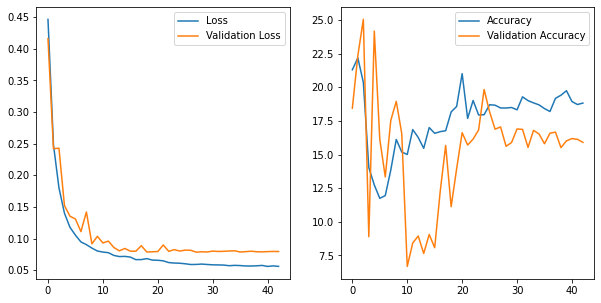

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

(67, 128, 128)


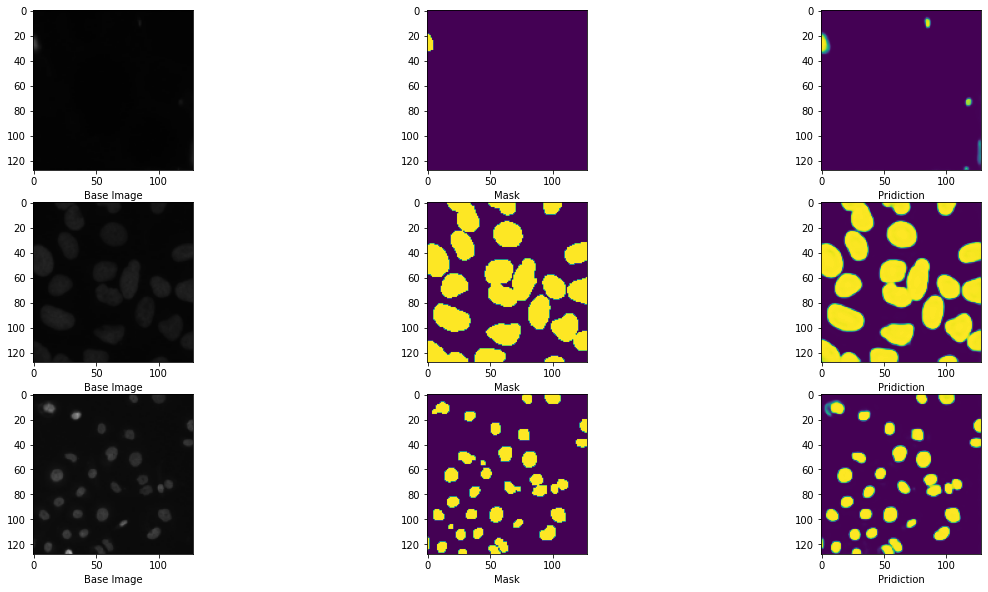

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(67, 128, 128)


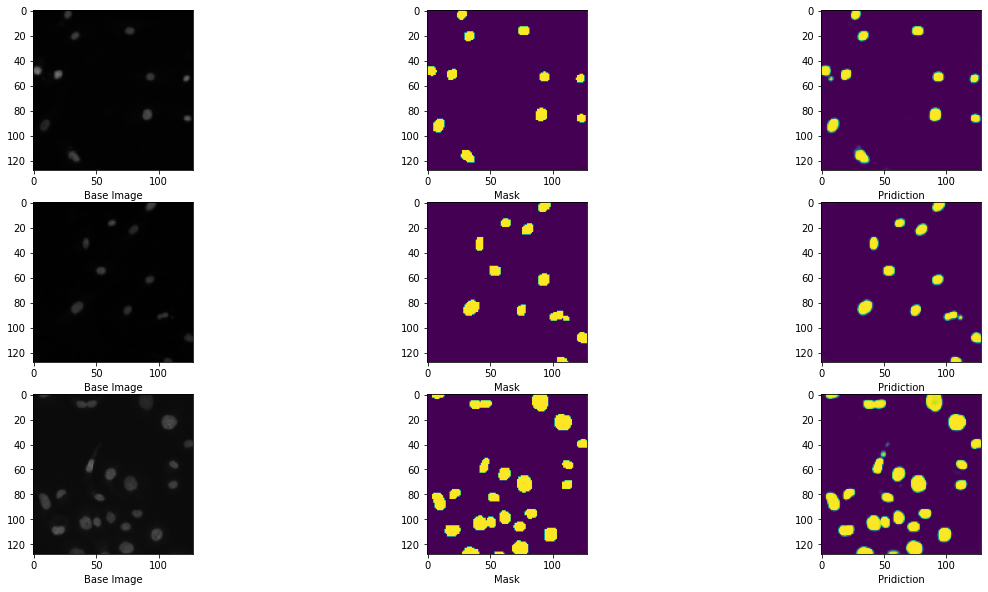

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(1097728, 1)

Area under the ROC curve: 0.9489201760144685


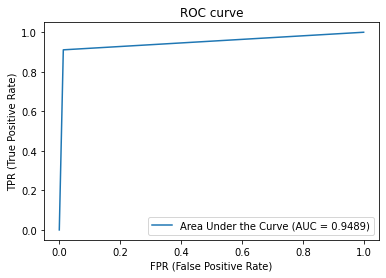

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

#preds = model.predict(validation_vol)
y_scores = preds.reshape(preds.shape[0]*preds.shape[1]*preds.shape[2]*1, 1)
print(y_scores.shape)

y_true = validation_seg.reshape(validation_seg.shape[0]*validation_seg.shape[1]*validation_seg.shape[2]*validation_seg.shape[3], 1)

y_scores = np.where(y_scores>0.5, 1, 0)
y_true   = np.where(y_true>0.5, 1, 0)


#output_folder = '/content/drive/My Drive/mammogram_segmentation/INB'

#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"ROC.png")


Area under Precision-Recall curve: 0.9413954327078325


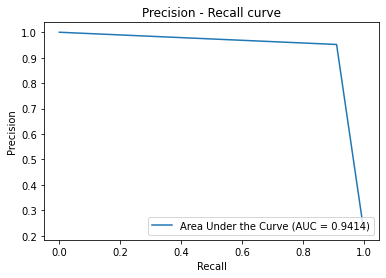

In [ ]:
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0] 
recall = np.fliplr([recall])[0]
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"Precision_recall.png")

In [ ]:
#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))


Confusion matrix:  Custom threshold (for positive) of 0.5
[[841887  11250]
 [ 21762 222829]]
Global Accuracy: 0.9599269764458955
Specificity: 0.9768133722954226
Sensitivity: 0.9010269797335143
Precision: 0.9419393025431585

Jaccard similarity score: 0.860966733244476

F1 score (F-measure): 0.9210339064491194


# Double U-Net using NASNet and DenseNet

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from IPython.display import clear_output
from sklearn.model_selection import train_test_split


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *
from tensorflow.keras.applications.inception_v3 import InceptionV3

def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x



def conv_block(inputs, filters):
    x = inputs

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = squeeze_excite_block(x)

    return x

In [ ]:
def encoder1(inputs):
    skip_connections = []
    model = NASNetMobile(include_top=False, weights='imagenet', input_tensor=inputs)    
    model.summary()
    model1 = DenseNet121(include_top=False, weights='imagenet', input_tensor=inputs)    
    model1.summary()
    #names = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]      #for VGG19
    #names = ["block1_conv2", "block2_conv2", "block3_conv3", "block4_conv1"]     #for VGG16
    #names = ["input_3", "conv1/relu", "pool2_conv", "pool3_conv"]      #for DenseNet121
    #names = ["conv2d_20" , "conv2d_30" , "conv2d_40"]

    skip_connections.append(model.get_layer("input_1").output)
    skip_connections.append(model1.get_layer("conv1/relu").output)
    skip_connections.append(model1.get_layer("pool2_conv").output)
    skip_connections.append(model1.get_layer("pool3_conv").output)

    output = model1.get_layer("pool4_conv").output                 #for DenseNet121
    return output, skip_connections

def decoder1(inputs, skip_connections):
    num_filters = [256, 128, 64, 32]
    skip_connections.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

def encoder2(inputs):
    num_filters = [32, 64, 128, 256]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2))(x)

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    num_filters = [256, 128, 64, 32]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_1[i], skip_2[i]])
        x = conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same")(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = Conv2D(filter, 1, padding="same")(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation='bilinear')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False)(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False)(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    outputs = Concatenate()([outputs1, outputs2])

    model = Model(inputs, outputs)
    return model

In [ ]:
#miou = tf.keras.metrics.MeanIoU(num_classes=2)
from tensorflow.keras.optimizers import Adam
model = build_model((128,128,3))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy', iou])

#model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
#                  metrics=[dice_coef, 'binary_accuracy', iou, miou])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 134, 134, 3)  0          ['input_1[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d_4[0][0]']       
                                                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 32, 32, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 32, 32, 192)  0          ['conv2_block3_concat[0][0]',    
 te)                                                              'conv2_block4_2_conv[0][0]']    
                                                                                                  
 conv2_block5_0_bn (BatchNormal  (None, 32, 32, 192)  768        ['conv2_block4_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss'),
           tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [ ]:
# The model is trained using Xception, DenseNet and VGG16

from IPython.display import clear_output 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((X_train), 
                                                            (Y_train).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)
#ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])])
#train_seg = ct.fit_transform(train_seg)



In [ ]:
print(train_vol.shape)
print(train_seg.shape)
print(train_seg.shape)
print(X_train.shape)

(542, 128, 128, 3)
(542, 128, 128, 1)
(542, 128, 128, 1)
(670, 128, 128, 3)


In [ ]:
loss_history = model.fit(x = train_vol,
                         y = train_seg,
                         batch_size = 16,
                         epochs = 30,
                         validation_data =(test_vol,test_seg) ,
                         callbacks=callbacks_list)

#clear_output()
                                                                        

print(validation_vol.shape)

Epoch 1/30
34/34 [==============================] - ETA: 0s - loss: 0.0827 - accuracy: 0.8366
Epoch 1: val_loss did not improve from 0.10333
34/34 [==============================] - 12s 346ms/step - loss: 0.0827 - accuracy: 0.8366 - val_loss: 0.1441 - val_accuracy: 0.8486 - lr: 0.0010
Epoch 2/30
34/34 [==============================] - ETA: 0s - loss: 0.0823 - accuracy: 0.8296
Epoch 2: val_loss did not improve from 0.10333
34/34 [==============================] - 11s 323ms/step - loss: 0.0823 - accuracy: 0.8296 - val_loss: 0.1367 - val_accuracy: 0.3045 - lr: 0.0010
Epoch 3/30
34/34 [==============================] - ETA: 0s - loss: 0.0779 - accuracy: 0.8061
Epoch 3: val_loss improved from 0.10333 to 0.10204, saving model to cxr_reg_weights_best.h5
34/34 [==============================] - 11s 330ms/step - loss: 0.0779 - accuracy: 0.8061 - val_loss: 0.1020 - val_accuracy: 0.6224 - lr: 0.0010
Epoch 4/30
34/34 [==============================] - ETA: 0s - loss: 0.0783 - accuracy: 0.8274
Epo

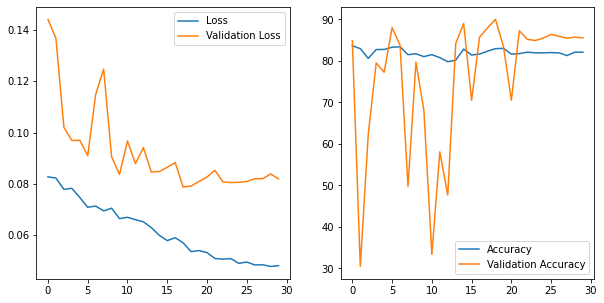

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

(67, 128, 128)


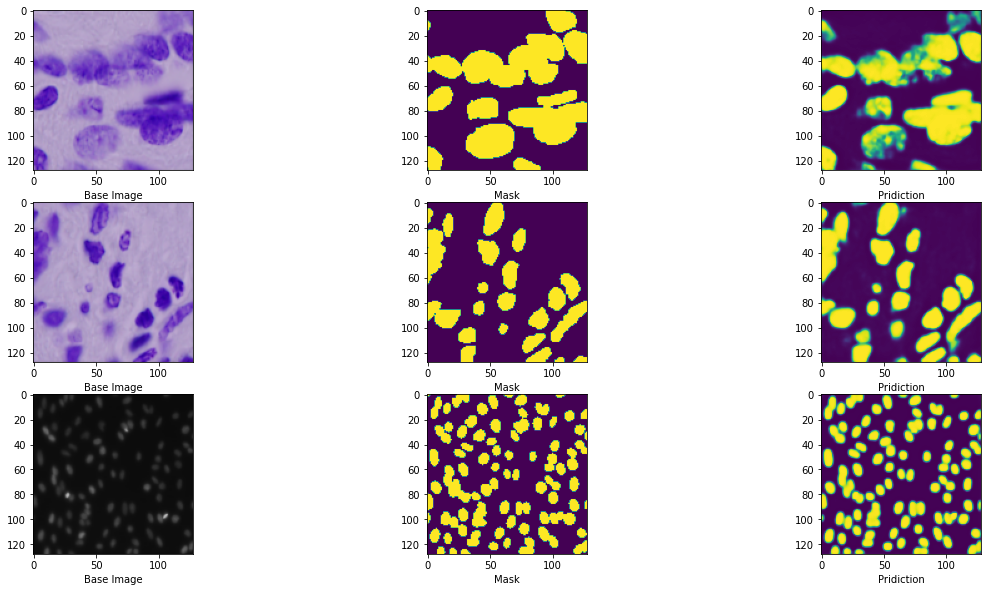

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(67, 128, 128)


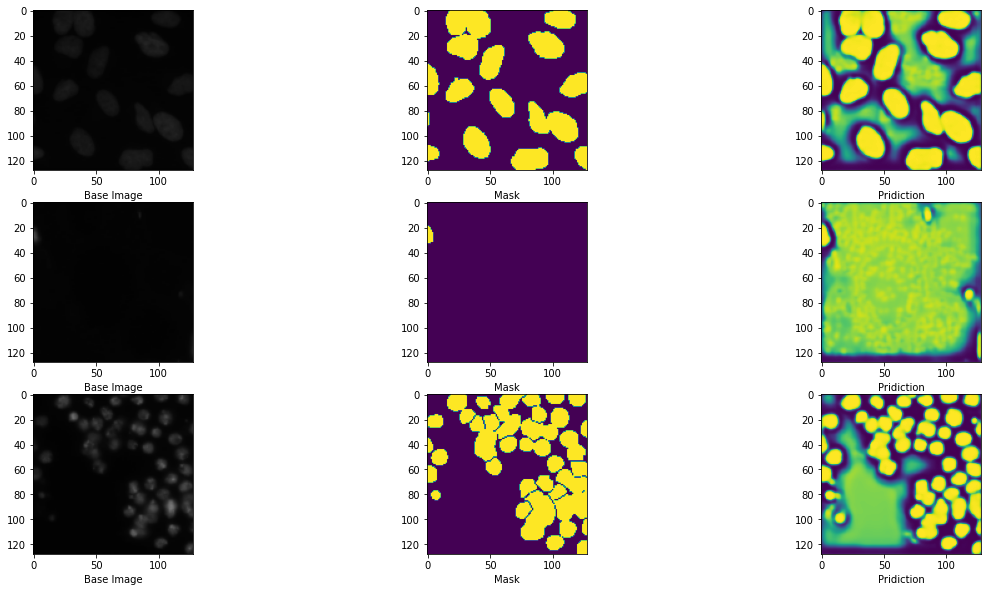

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],30)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(1097728, 1)

Area under the ROC curve: 0.8286551069508074


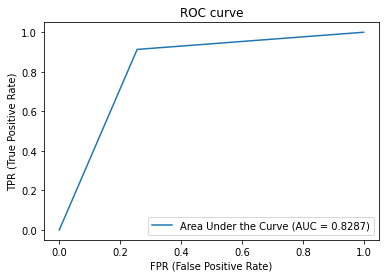

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

#preds = model.predict(validation_vol)
y_scores = preds.reshape(preds.shape[0]*preds.shape[1]*preds.shape[2]*1, 1)
print(y_scores.shape)

y_true = validation_seg.reshape(validation_seg.shape[0]*validation_seg.shape[1]*validation_seg.shape[2]*validation_seg.shape[3], 1)

y_scores = np.where(y_scores>0.5, 1, 0)
y_true   = np.where(y_true>0.5, 1, 0)


#output_folder = '/content/drive/My Drive/mammogram_segmentation/INB'

#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"ROC.png")


Area under Precision-Recall curve: 0.7191268516137174


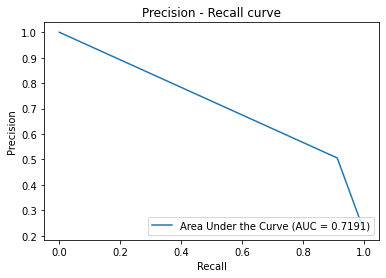

In [ ]:
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0] 
recall = np.fliplr([recall])[0]
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"Precision_recall.png")

In [ ]:
#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))


Confusion matrix:  Custom threshold (for positive) of 0.5
[[634889 218248]
 [ 21248 223343]]
Global Accuracy: 0.7818257346082089
Specificity: 0.7441817668205692
Sensitivity: 0.9131284470810455
Precision: 0.5057689128628075

Jaccard similarity score: 0.48255008761145884

F1 score (F-measure): 0.6509730654549377


# Double U-Net (Inception with DenseNet)

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from IPython.display import clear_output
from sklearn.model_selection import train_test_split


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *
from tensorflow.keras.applications.inception_v3 import InceptionV3

def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x



def conv_block(inputs, filters):
    x = inputs

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = squeeze_excite_block(x)

    return x

In [ ]:
def encoder1(inputs):
    skip_connections = []
    model = InceptionV3(include_top=False, weights='imagenet', input_tensor=inputs)    
    model1 = DenseNet121(include_top=False, weights='imagenet', input_tensor=inputs)    

    skip_connections.append(model.get_layer("input_1").output)
    skip_connections.append(model1.get_layer("conv1/relu").output)
    skip_connections.append(model1.get_layer("pool2_conv").output)
    skip_connections.append(model1.get_layer("pool3_conv").output)

    output = model1.get_layer("pool4_conv").output                 #for DenseNet121
    return output, skip_connections

def decoder1(inputs, skip_connections):
    num_filters = [256, 128, 64, 32]
    skip_connections.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

def encoder2(inputs):
    num_filters = [32, 64, 128, 256]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2))(x)

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    num_filters = [256, 128, 64, 32]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_1[i], skip_2[i]])
        x = conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same")(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = Conv2D(filter, 1, padding="same")(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation='bilinear')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False)(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False)(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    outputs = Concatenate()([outputs1, outputs2])

    model = Model(inputs, outputs)
    return model

In [ ]:
#miou = tf.keras.metrics.MeanIoU(num_classes=2)
from tensorflow.keras.optimizers import Adam
model = build_model((128,128,3))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy', iou])

#model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
#                  metrics=[dice_coef, 'binary_accuracy', iou, miou])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 conv2_block1_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv2_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block1_2_conv (Conv2D)   (None, 32, 32, 32)   36864       ['conv2_block1_1_relu[0][0]']    
                                                                                                  
 conv2_block1_concat (Concatena  (None, 32, 32, 96)  0           ['pool1[0][0]',                  
 te)                                                              'conv2_block1_2_conv[0][0]']    
                                                                                                  
 conv2_block2_0_bn (BatchNormal  (None, 32, 32, 96)  384         ['conv2_block1_concat[0][0]']    
 ization) 

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss'),
           tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
from IPython.display import clear_output 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((X_train), 
                                                            (Y_train).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)

In [ ]:
print(train_vol.shape)
print(train_seg.shape)
print(train_seg.shape)
print(X_train.shape)

(542, 128, 128, 3)
(542, 128, 128, 1)
(542, 128, 128, 1)
(670, 128, 128, 3)


In [ ]:
loss_history = model.fit(x = train_vol,
                         y = train_seg,
                         batch_size = 16,
                         epochs = 30,
                         validation_data =(test_vol,test_seg) ,
                         callbacks=callbacks_list)

#clear_output()
                                                                        

print(validation_vol.shape)

Epoch 1/30
34/34 [==============================] - ETA: 0s - loss: 0.1181 - accuracy: 0.8559
Epoch 1: val_loss improved from 0.16506 to 0.12890, saving model to cxr_reg_weights_best.h5
34/34 [==============================] - 14s 410ms/step - loss: 0.1181 - accuracy: 0.8559 - val_loss: 0.1289 - val_accuracy: 0.8521 - lr: 5.0000e-04
Epoch 2/30
34/34 [==============================] - ETA: 0s - loss: 0.1094 - accuracy: 0.8389
Epoch 2: val_loss improved from 0.12890 to 0.12774, saving model to cxr_reg_weights_best.h5
34/34 [==============================] - 12s 348ms/step - loss: 0.1094 - accuracy: 0.8389 - val_loss: 0.1277 - val_accuracy: 0.8837 - lr: 5.0000e-04
Epoch 3/30
34/34 [==============================] - ETA: 0s - loss: 0.1029 - accuracy: 0.8434
Epoch 3: val_loss did not improve from 0.12774
34/34 [==============================] - 11s 320ms/step - loss: 0.1029 - accuracy: 0.8434 - val_loss: 0.1385 - val_accuracy: 0.8574 - lr: 5.0000e-04
Epoch 4/30
34/34 [======================

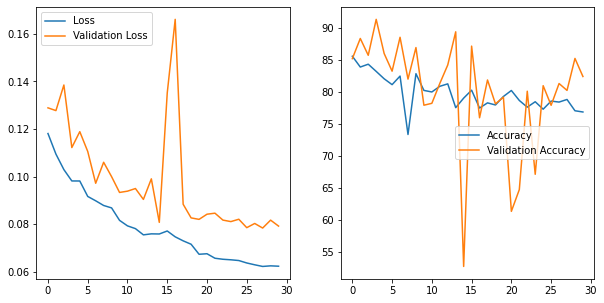

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

(67, 128, 128)


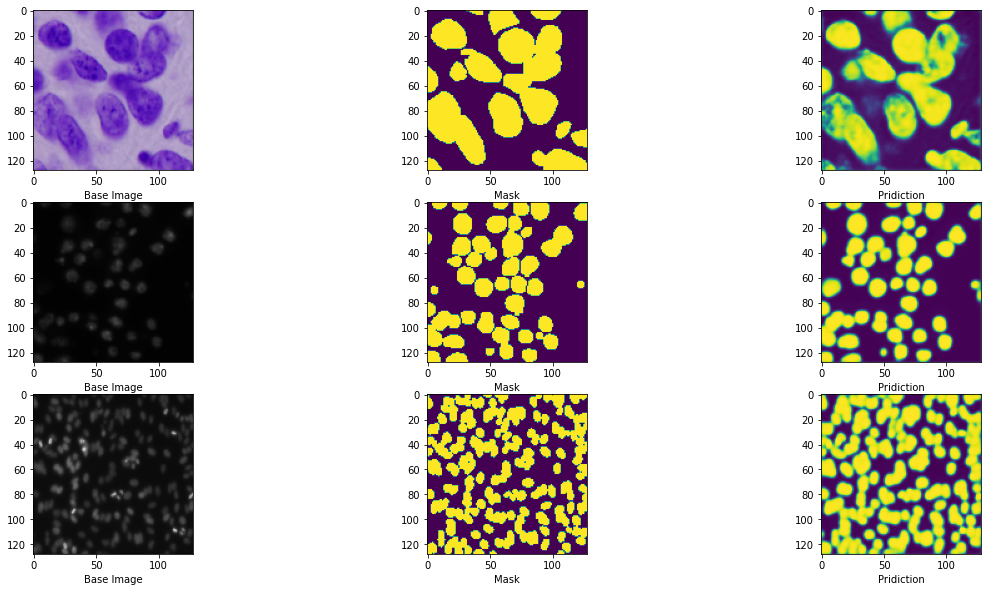

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(1097728, 1)

Area under the ROC curve: 0.9380306215206965


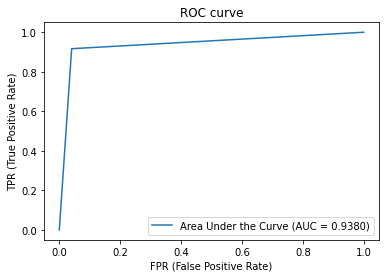

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

#preds = model.predict(validation_vol)
y_scores = preds.reshape(preds.shape[0]*preds.shape[1]*preds.shape[2]*1, 1)
print(y_scores.shape)

y_true = validation_seg.reshape(validation_seg.shape[0]*validation_seg.shape[1]*validation_seg.shape[2]*validation_seg.shape[3], 1)

y_scores = np.where(y_scores>0.5, 1, 0)
y_true   = np.where(y_true>0.5, 1, 0)


#output_folder = '/content/drive/My Drive/mammogram_segmentation/INB'

#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"ROC.png")


Area under Precision-Recall curve: 0.9006919401798661


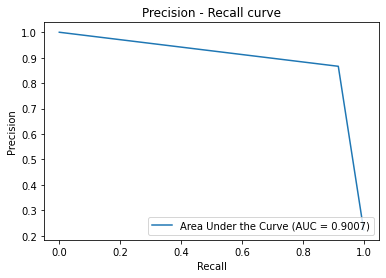

In [ ]:
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0] 
recall = np.fliplr([recall])[0]
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"Precision_recall.png")

In [ ]:
#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))


Confusion matrix:  Custom threshold (for positive) of 0.5
[[818486  34651]
 [ 20380 224211]]
Global Accuracy: 0.9498682733791978
Specificity: 0.9593840145252169
Sensitivity: 0.916677228516176
Precision: 0.8661410326737798

Jaccard similarity score: 0.8029272100901726

F1 score (F-measure): 0.8906928750052141


# Double U-Net (MobileNet and DenseNet)

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from IPython.display import clear_output
from sklearn.model_selection import train_test_split


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *
from tensorflow.keras.applications.inception_v3 import InceptionV3

def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x



def conv_block(inputs, filters):
    x = inputs

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = squeeze_excite_block(x)

    return x

In [ ]:
def encoder1(inputs):
    skip_connections = []
    model = MobileNetV2(include_top=False, weights='imagenet', input_tensor=inputs)    
    model.summary()
    model1 = DenseNet121(include_top=False, weights='imagenet', input_tensor=inputs)    
    model1.summary()

    skip_connections.append(model.get_layer("input_2").output)
    skip_connections.append(model1.get_layer("conv1/relu").output)
    skip_connections.append(model1.get_layer("pool2_conv").output)
    skip_connections.append(model1.get_layer("pool3_conv").output)

    output = model1.get_layer("pool4_conv").output                 #for DenseNet121
    return output, skip_connections

def decoder1(inputs, skip_connections):
    num_filters = [256, 128, 64, 32]
    skip_connections.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

def encoder2(inputs):
    num_filters = [32, 64, 128, 256]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2))(x)

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    num_filters = [256, 128, 64, 32]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_1[i], skip_2[i]])
        x = conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same")(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = Conv2D(filter, 1, padding="same")(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation='bilinear')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False)(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False)(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    outputs = Concatenate()([outputs1, outputs2])

    model = Model(inputs, outputs)
    return model

In [ ]:
#miou = tf.keras.metrics.MeanIoU(num_classes=2)
model = build_model((128,128,3))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy', iou])

#model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
#                  metrics=[dice_coef, 'binary_accuracy', iou, miou])
model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 conv3_block1_0_bn (BatchNormal  (None, 16, 16, 128)  512        ['pool2_pool[0][0]']             
 ization)                                                                                         
                                                                                                  
 conv3_block1_0_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block1_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block1_1_conv (Conv2D)   (None, 16, 16, 128)  16384       ['conv3_block1_0_relu[0][0]']    
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block1_1_conv[0][0]']    
 ization) 

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss'),
           tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
from IPython.display import clear_output 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((X_train), 
                                                            (Y_train).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)

In [ ]:
print(train_vol.shape)
print(train_seg.shape)
print(train_seg.shape)
print(X_train.shape)

(542, 128, 128, 3)
(542, 128, 128, 1)
(542, 128, 128, 1)
(670, 128, 128, 3)


In [ ]:
loss_history = model.fit(x = train_vol,
                         y = train_seg,
                         batch_size = 16,
                         epochs = 50,
                         validation_data =(test_vol,test_seg) ,
                         callbacks=callbacks_list)

#clear_output()
                                                                        

print(validation_vol.shape)

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.0820 - accuracy: 0.5244
Epoch 1: val_loss did not improve from 0.07832
34/34 [==============================] - 12s 344ms/step - loss: 0.0820 - accuracy: 0.5244 - val_loss: 0.0865 - val_accuracy: 0.7389 - lr: 5.0000e-04
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.0775 - accuracy: 0.5126
Epoch 2: val_loss did not improve from 0.07832
34/34 [==============================] - 11s 323ms/step - loss: 0.0775 - accuracy: 0.5126 - val_loss: 0.0976 - val_accuracy: 0.7189 - lr: 5.0000e-04
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.0753 - accuracy: 0.5337
Epoch 3: val_loss did not improve from 0.07832
34/34 [==============================] - 11s 320ms/step - loss: 0.0753 - accuracy: 0.5337 - val_loss: 0.0899 - val_accuracy: 0.7637 - lr: 5.0000e-04
Epoch 4/50
34/34 [==============================] - ETA: 0s - loss: 0.0749 - accuracy: 0.5546
Epoch 4: val_loss did not improve fr

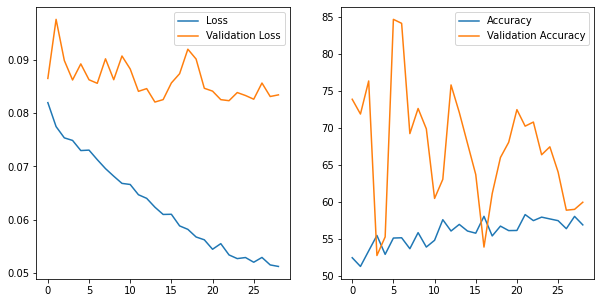

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

(67, 128, 128)


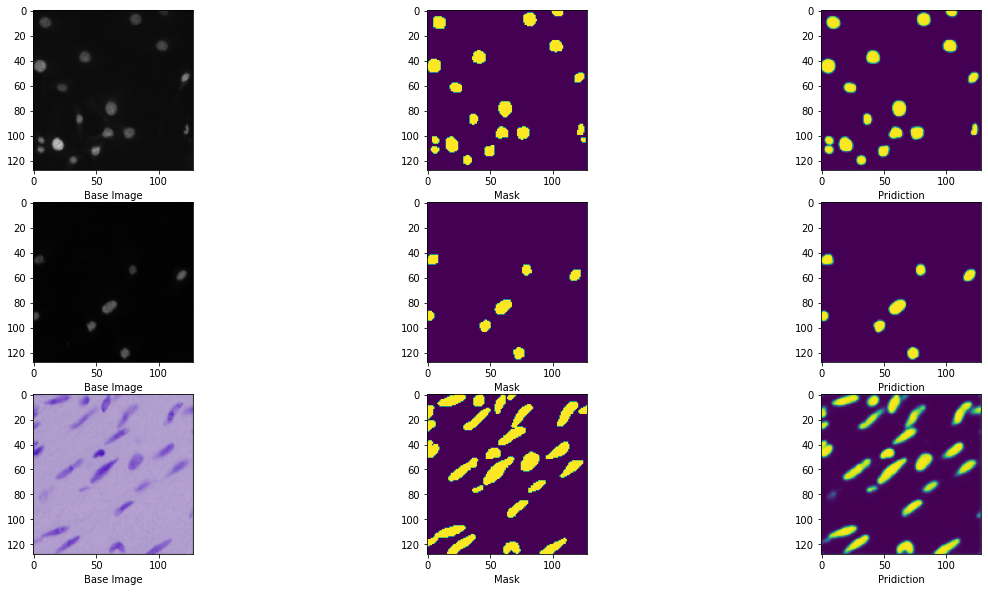

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)
preds = preds[:,:,:,1]
print(preds.shape)
plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

(1097728, 1)

Area under the ROC curve: 0.9380633744681932


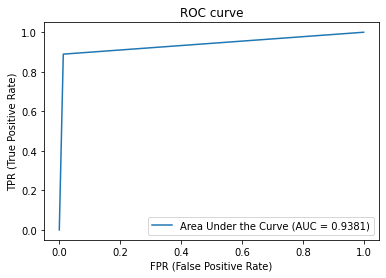

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

#preds = model.predict(validation_vol)
y_scores = preds.reshape(preds.shape[0]*preds.shape[1]*preds.shape[2]*1, 1)
print(y_scores.shape)

y_true = validation_seg.reshape(validation_seg.shape[0]*validation_seg.shape[1]*validation_seg.shape[2]*validation_seg.shape[3], 1)

y_scores = np.where(y_scores>0.5, 1, 0)
y_true   = np.where(y_true>0.5, 1, 0)


#output_folder = '/content/drive/My Drive/mammogram_segmentation/INB'

#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"ROC.png")


Area under Precision-Recall curve: 0.9324778491801295


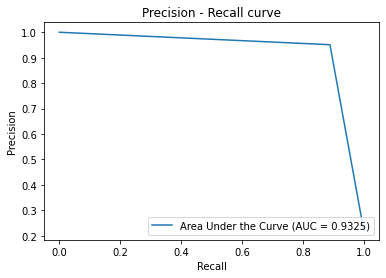

In [ ]:
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0] 
recall = np.fliplr([recall])[0]
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(output_folder+"Precision_recall.png")

In [ ]:
#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))


Confusion matrix:  Custom threshold (for positive) of 0.5
[[841936  11201]
 [ 27087 217504]]
Global Accuracy: 0.9651206856343284
Specificity: 0.9868708073849803
Sensitivity: 0.8892559415514062
Precision: 0.9510242452067074

Jaccard similarity score: 0.8503158816538438

F1 score (F-measure): 0.9191034785842264
